# Mood Prediction Using Smartphone Data
### Data Mining Techniques | Vrije Universiteit Amsterdam | April 2024
##### Lieve Jilesen (ljn278), Ryan Ott (rot280), and Jaime Perez y Perez (jpz240) | Group 17

## 1 - Data Preparation

### 1.1 - Exploratory Data Analysis

#### Importing packages & loading data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

file_path = 'data/dataset_mood_smartphone.csv'
df = pd.read_csv(file_path, parse_dates=['time'], index_col=0)
df

id                    time        variable   value
1        AS14.01 2014-02-26 13:00:00.000            mood   6.000
2        AS14.01 2014-02-26 15:00:00.000            mood   6.000
3        AS14.01 2014-02-26 18:00:00.000            mood   6.000
4        AS14.01 2014-02-26 21:00:00.000            mood   7.000
5        AS14.01 2014-02-27 09:00:00.000            mood   6.000
...          ...                     ...             ...     ...
2770399  AS14.30 2014-04-11 07:51:16.948  appCat.weather   8.032
2772465  AS14.30 2014-04-19 11:00:32.747  appCat.weather   3.008
2774026  AS14.30 2014-04-26 10:19:07.434  appCat.weather   7.026
2774133  AS14.30 2014-04-27 00:44:48.450  appCat.weather  23.033
2784435  AS14.32 2014-04-07 18:25:14.036  appCat.weather  22.431

[376912 rows x 4 columns]

#### General data properties

In [2]:
num_records = df.shape[0]
num_participants = df.id.nunique()
num_days = df.time.dt.date.nunique()
num_variables = df.variable.nunique()

data_characteristics = {
    "Number of Records": [num_records],
    "Number of Participants": [num_participants],
    "Number of Days": [num_days],
    "Number of Variables": [num_variables],
}

data_characteristics_df = pd.DataFrame(data_characteristics)
data_characteristics_df

Number of Records  Number of Participants  Number of Days  \
0             376912                      27             113   

   Number of Variables  
0                   19

#### Variable properties

In [3]:
def create_summary_df(df):
    # Create a summary table for the dataset
    summary_data = {
        "Variable": [],
        "Data Type": [],
        "Total Records": [],
        "Unique Values": [],
        "Missing Values": [],
        "Mean": [],
        "Std": [],
        "Min": [],
        "25%": [],
        "50%": [],
        "75%": [],
        "Max": []
    }

    for var in df.variable.unique():
        var_data = df[df['variable'] == var]['value']
        desc = var_data.describe()
        summary_data["Variable"].append(var)
        summary_data["Data Type"].append(df[df['variable'] == var]['value'].dtype)
        summary_data["Total Records"].append(var_data.count())
        summary_data["Unique Values"].append(var_data.nunique())
        summary_data["Missing Values"].append(df[df['variable'] == var]['value'].isnull().sum())
        summary_data["Mean"].append(desc['mean'])
        summary_data["Std"].append(desc['std'])
        summary_data["Min"].append(desc['min'])
        summary_data["25%"].append(desc['25%'])
        summary_data["50%"].append(desc['50%'])
        summary_data["75%"].append(desc['75%'])
        summary_data["Max"].append(desc['max'])

    return pd.DataFrame(summary_data)

In [4]:
summary_df = create_summary_df(df)
summary_df

Variable Data Type  Total Records  Unique Values  \
0                   mood   float64           5641             10   
1     circumplex.arousal   float64           5597              5   
2     circumplex.valence   float64           5487              5   
3               activity   float64          22965           1868   
4                 screen   float64          96578          64646   
5                   call   float64           5239              1   
6                    sms   float64           1798              1   
7         appCat.builtin   float64          91288          23237   
8   appCat.communication   float64          74276          39890   
9   appCat.entertainment   float64          27125          12575   
10        appCat.finance   float64            939            729   
11           appCat.game   float64            813            792   
12         appCat.office   float64           5642           3178   
13          appCat.other   float64           7650           5014   
14         appCat.social   float64          19145          14660   
15         appCat.travel   float64           2846           2606   
16        appCat.unknown   float64            939            846   
17      appCat.utilities   float64           2487           1732   
18        appCat.weather   float64            255            250   

    Missing Values        Mean         Std        Min       25%        50%  \
0                0    6.992555    1.032769      1.000   7.00000   7.000000   
1               46   -0.098624    1.051868     -2.000  -1.00000   0.000000   
2              156    0.687808    0.671298     -2.000   0.00000   1.000000   
3                0    0.115958    0.186946      0.000   0.00000   0.021739   
4                0   75.335206  253.822497      0.035   5.32225  20.044500   
5                0    1.000000    0.000000      1.000   1.00000   1.000000   
6                0    1.000000    0.000000      1.000   1.00000   1.000000   
7                0   18.538262  415.989243 -82798.871   2.02000   4.038000   
8                0   43.343792  128.912750      0.006   5.21800  16.225500   
9                0   37.576480  262.960476     -0.011   1.33400   3.391000   
10               0   21.755251   39.218361      0.131   4.07200   8.026000   
11               0  128.391615  327.145246      1.003  14.14800  43.168000   
12               0   22.578892  449.601382      0.003   2.00400   3.106000   
13               0   25.810839  112.781355      0.014   7.01900  10.028000   
14               0   72.401906  261.551846      0.094   9.03000  28.466000   
15               0   45.730850  246.109307      0.080   5.08650  18.144000   
16               0   45.553006  119.400405      0.111   5.01800  17.190000   
17               0   18.537552   60.959134      0.246   3.15850   8.030000   
18               0   20.148714   24.943431      1.003   8.68400  15.117000   

           75%        Max  
0     8.000000     10.000  
1     1.000000      2.000  
2     1.000000      2.000  
3     0.158333      1.000  
4    62.540250   9867.007  
5     1.000000      1.000  
6     1.000000      1.000  
7     9.922000  33960.246  
8    45.475750   9830.777  
9    14.922000  32148.677  
10   20.155000    355.513  
11  123.625000   5491.793  
12    8.043750  32708.818  
13   16.829250   3892.038  
14   75.372000  30000.906  
15   47.227250  10452.615  
16   44.430500   2239.937  
17   19.331000   1802.649  
18   25.349000    344.863

#### Any records missing id or time?

In [5]:
# Do we have any records without index, id or time?
df[df['id'].isnull() | df['time'].isnull()]

Empty DataFrame
Columns: [id, time, variable, value]
Index: []

No, thankfully not.

#### Distribution of variable values

In [6]:
def plot_vars_dist(df):
    variables = [var for var in df['variable'].unique() if var not in ['sms', 'call']]  # ignoring these as they are only 1 value indicating occurence of a call/sms
    fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(10, 6 * len(variables)))

    for ax, var in zip(axes.flatten(), variables):
        var_data = df[df['variable'] == var]['value'].dropna()
        mean = var_data.mean()
        std = var_data.std()
        # Adjust bins for better visualization based on data range and characteristics
        bins = min(30, int(var_data.nunique()))  # Use a minimum of 30 bins or less if fewer unique values

        ax.hist(var_data, bins=bins, alpha=0.75, color='blue', edgecolor='black', label=f'{var} Scores')
        ax.set_title(f'Distribution of {var} values')
        ax.set_xlabel(f'{var.capitalize()} Score')
        ax.set_ylabel('Frequency')
        ax.grid(axis='y', alpha=0.75)
        legend_label = f"Mean: {mean:.2f}, Std: {std:.2f}"
        ax.legend([f"{var.capitalize()} Scores\n{legend_label}"], loc='upper right', title='Statistics', frameon=True)

    plt.tight_layout()
    plt.show()

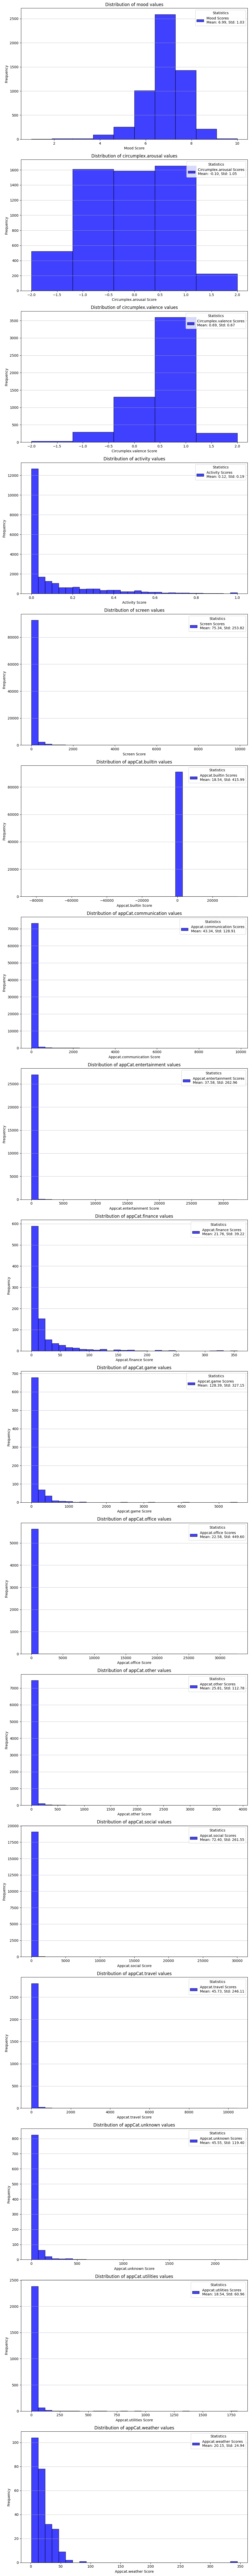

In [7]:
plot_vars_dist(df)

Histograms showing the distribution of possible values for the different (non-boolean) variables in our dataset. The mood, valence and arousal of participants seems to be normally distributed with different means and variances. All other variables seem to perhaps follow an exponential distribution, with most mass close to 0 and decreasing number of records with higher values. We do also see outliers present in the exponentially distributed data.

#### Mood for a participant

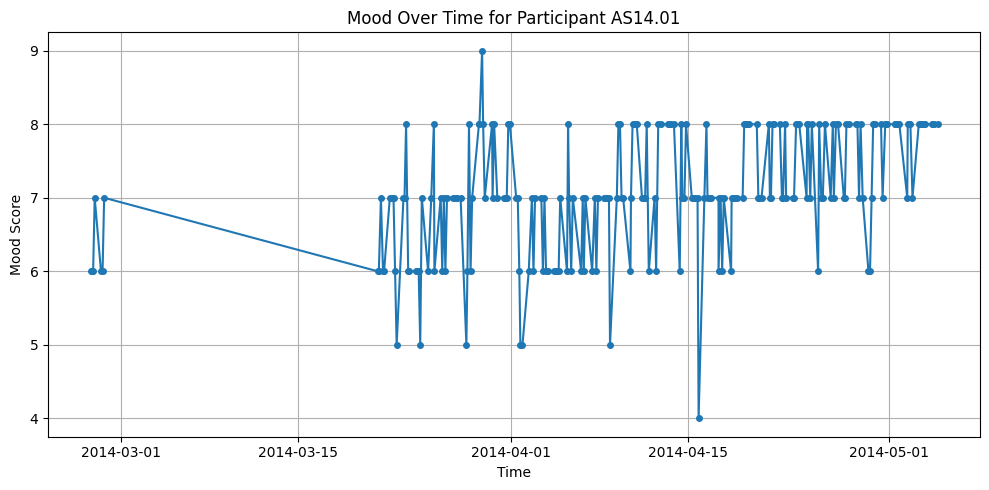

In [8]:
# Time Series of Mood for a Selected Participant
participant_data = df[(df['id'] == 'AS14.01') & (df['variable'] == 'mood')]
plt.figure(figsize=(10, 5))
plt.plot(participant_data['time'], participant_data['value'], marker='o', markersize=4, linestyle='-')
plt.title('Mood Over Time for Participant AS14.01')
plt.xlabel('Time')
plt.ylabel('Mood Score')
plt.xticks()
plt.grid()
plt.tight_layout()
plt.show()

Timeseries plot of the mood scores given by the first participant. We see it being around 7 +- 1 for most of the time, with rare moments of more extreme emotions. We also see long gaps in the record availability.

#### Correlation map for variables with mood

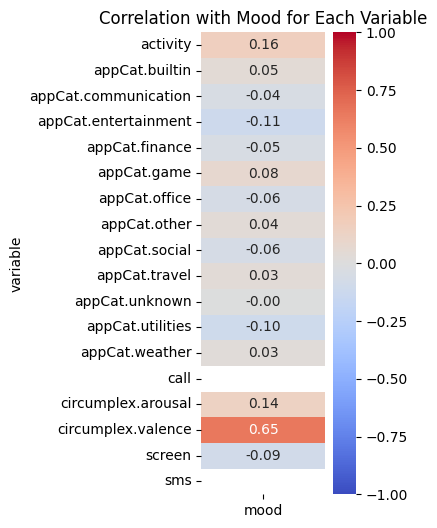

In [9]:
data = df.groupby(['id', 'variable', df['time'].dt.date])['value'].mean()
data = data.reset_index()
data['value'] = data['value'].astype(float)
data['time'] = data['time'].astype("string")
data.loc[data['variable'] == 'mood', 'value'] = np.round(data.loc[data['variable'] == 'mood', 'value'])

# Create pivot table
pivot_table = data.pivot_table(index=['id', 'time'], columns='variable', values='value', aggfunc='mean')
correlation_matrix = pivot_table.corr()

# Filter to only show correlations of all variables with 'mood'
mood_correlations = correlation_matrix[['mood']].drop(index='mood')

# Plot the heatmap
plt.figure(figsize=(2, 6))
# sns.heatmap(mood_correlations, annot=True, fmt=".2f", cmap='coolwarm', vmin=mood_correlations.min(), vmax=mood_correlations.max())
sns.heatmap(mood_correlations, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Mood for Each Variable')
plt.xlabel('')
plt.show()

In [10]:
#*** OLD NOT USED ***
# Correlation heatmap of all variables
# data = df.groupby(['id','variable',df['time'].dt.date])['value'].mean()
# data = data.reset_index()
# data['value'] = data['value'].astype(float)
# data['time'] = data['time'].astype("string")
# data.loc[data['variable'] == 'mood', 'value'] = np.round(data.loc[data['variable'] == 'mood', 'value'])

# pivot_table = data.pivot_table(index=['id', 'time'], columns='variable', values='value', aggfunc='mean')
# correlation_matrix = pivot_table.corr()

# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
# plt.title('Correlation Heatmap of Variables')
# plt.show()

The heatmap of correlation of all variables with mood, providing a color-coded representation of the correlation values, with warmer colors indicating stronger positive correlations and cooler colors indicating stronger negative correlations. (`call` and `sms` are not visible as they are only recorded when a call takes place so it always has a value of 1).
The `circumplex.valence` especially seems to be highly positively corellated with mood, while using entertainment apps for longer seems to correlate most negatively with mood. We also see a number of variables that seem to have almost no corellation with mood (such as `appCat.unknown`, `appCat.weather`) and as such might be suitable candidates to be removed, as they provide no further information and instead only represent more computations that we have to perform.

#### Activity & mood relationship

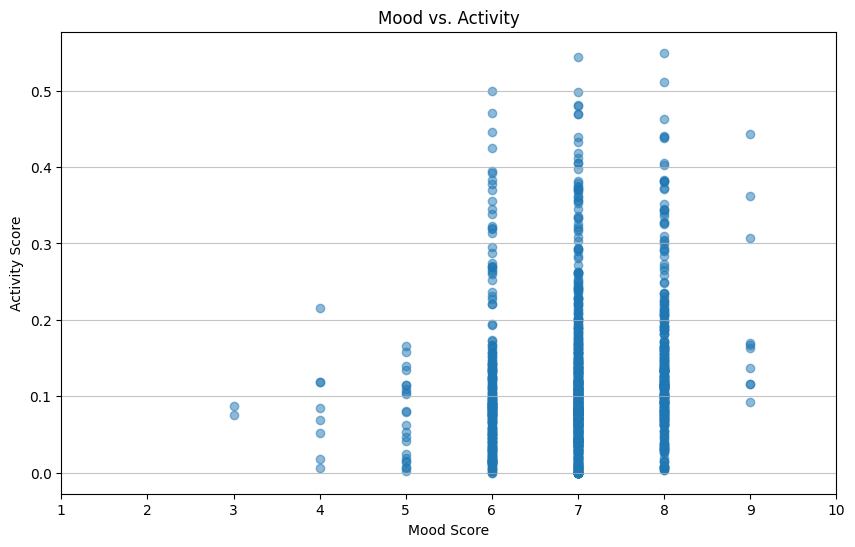

In [11]:
# Activity and Mood Relationship
activity_data = data[data['variable'] == 'activity']
mood_data = data[data['variable'] == 'mood']

# Merging on ID and Time for direct comparison
activity_mood_merged = pd.merge(activity_data, mood_data, on=['id', 'time'], suffixes=('_activity', '_mood'))

plt.figure(figsize=(10, 6))
plt.scatter(activity_mood_merged['value_mood'], activity_mood_merged['value_activity'], alpha=0.5)
plt.title('Mood vs. Activity')
plt.xlabel('Mood Score')
plt.ylabel('Activity Score')
plt.xticks(range(1, 11))
plt.grid(axis='y', alpha=0.75)
plt.show()

Plot showing co-occurence of mood with activiy scores for all participants. If the mood is in the common range of 7±1 we see participants record a wide range of activity scores, while if the mood is low, there is no high activity. 

### 1.2 - Data Cleaning

#### Removing incorrect values

Because all `appCat.*` variables and `screen` should denote a time duration, they cannot be negative. Thus, any records with negative duration must be incorrect and removed. We see this is the case for example when looking at the variables properties table under section 1.1, where the min value for `appCat.builtin` is highly negative.

In [12]:
# List of variables denoting time durations
time_variables = [var for var in df['variable'].unique() if 'appCat.' in var or var == 'screen']

# Remove records with negative durations for time variables
print("Removed records due to negative values:")
initial_count = df.shape[0]
for var in time_variables:
    before_count = df[df['variable'] == var].shape[0]
    df = df[~((df['variable'] == var) & (df['value'] < 0))]
    after_count = df[df['variable'] == var].shape[0]
    print(f"{before_count - after_count} from {var}")

total_removed = initial_count - df.shape[0]
print(f"Total records removed: {total_removed}")

Removed records due to negative values:
0 from screen
3 from appCat.builtin
0 from appCat.communication
1 from appCat.entertainment
0 from appCat.finance
0 from appCat.game
0 from appCat.office
0 from appCat.other
0 from appCat.social
0 from appCat.travel
0 from appCat.unknown
0 from appCat.utilities
0 from appCat.weather
Total records removed: 4


#### Removing extreme values

For numeric variables that are not self-reported by the participants (so not `mood`, `arousal`, `valence`, & `activity`, and also not `call` or `SMS`) we remove values that lie outside of the interquartile range (IQR). To do this, we first calculate the IQR, which is the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the data. Values that fall below $Q1 - 1.5 * IQR$ or above $Q3 + 1.5 * IQR$ are considered outliers and are thus excluded from the analysis to prevent them from skewing the results. Its better suited for this scenario because unlike using the z-score method for example, this method doesn't necessarily assume an underlying normal distribution.

In [13]:
# Outlier removal using the Interquartile Range (IQR) method
def remove_iqr_outliers(df, variable, iqr_range=1.5):  # set iqr_range to higher to exclude fewer
    # Filter the dataset for a specific variable
    filter_df = df[df['variable'] == variable]
    Q1 = filter_df['value'].quantile(0.25)
    Q3 = filter_df['value'].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - iqr_range * IQR
    upper_bound = Q3 + iqr_range * IQR

    # Filtering out outliers
    before_removal = filter_df.shape[0]
    filtered_df = filter_df[(filter_df['value'] >= lower_bound) & (filter_df['value'] <= upper_bound)]
    after_removal = filtered_df.shape[0]

    print(f'{before_removal - after_removal} outliers from {variable}')
    return df[(df['variable'] != variable) | ((df['value'] >= lower_bound) & (df['value'] <= upper_bound))]

In [14]:
# Variables for which we remove outliers
# store the count of each variable in a dict
exclude_vars = ['mood', 'circumplex.arousal', 'circumplex.valence', 'activity', 'call', 'sms']
outlier_vars = [var for var in df['variable'].unique() if var not in exclude_vars]

print('Removed outliers using IQR method:')
initial_count = df.shape[0]
for var in outlier_vars:
    df = remove_iqr_outliers(df, var)
total_removed = initial_count - df.shape[0]
print(f"Total records removed: {total_removed}")

Removed outliers using IQR method:
10055 outliers from screen
10150 outliers from appCat.builtin
6401 outliers from appCat.communication
4517 outliers from appCat.entertainment
118 outliers from appCat.finance
85 outliers from appCat.game
848 outliers from appCat.office
1000 outliers from appCat.other
1838 outliers from appCat.social
181 outliers from appCat.travel
80 outliers from appCat.unknown
182 outliers from appCat.utilities
10 outliers from appCat.weather
Total records removed: 35465


In [15]:
summary_df = create_summary_df(df)
summary_df

Variable Data Type  Total Records  Unique Values  \
0                   mood   float64           5641             10   
1     circumplex.arousal   float64           5597              5   
2     circumplex.valence   float64           5487              5   
3               activity   float64          22965           1868   
4                 screen   float64          86523          54685   
5                   call   float64           5239              1   
6                    sms   float64           1798              1   
7         appCat.builtin   float64          81135          14334   
8   appCat.communication   float64          67875          33604   
9   appCat.entertainment   float64          22607           8234   
10        appCat.finance   float64            821            611   
11           appCat.game   float64            728            707   
12         appCat.office   float64           4794           2346   
13          appCat.other   float64           6650           4017   
14         appCat.social   float64          17307          12826   
15         appCat.travel   float64           2665           2425   
16        appCat.unknown   float64            859            766   
17      appCat.utilities   float64           2305           1550   
18        appCat.weather   float64            245            240   

    Missing Values       Mean        Std    Min       25%        50%  \
0                0   6.992555   1.032769  1.000   7.00000   7.000000   
1               46  -0.098624   1.051868 -2.000  -1.00000   0.000000   
2              156   0.687808   0.671298 -2.000   0.00000   1.000000   
3                0   0.115958   0.186946  0.000   0.00000   0.021739   
4                0  29.914995  33.657583  0.035   5.20100  15.514000   
5                0   1.000000   0.000000  1.000   1.00000   1.000000   
6                0   1.000000   0.000000  1.000   1.00000   1.000000   
7                0   5.208883   4.571340  0.001   2.00800   3.665000   
8                0  23.674507  24.677206  0.006   5.09550  13.321000   
9                0   5.325442   6.822312  0.001   1.07350   2.405000   
10               0  10.191018   9.281733  0.131   4.01400   7.025000   
11               0  59.740750  65.223873  1.003  12.90600  34.869500   
12               0   3.975585   3.378695  0.003   1.77275   3.009000   
13               0  10.190050   6.360926  0.014   6.05400   9.039000   
14               0  38.415498  40.500624  0.094   7.38600  23.105000   
15               0  26.027416  26.208979  0.080   5.01500  15.652000   
16               0  22.608378  23.543593  0.111   4.22300  13.132000   
17               0  10.524939   9.589525  0.246   3.04600   7.023000   
18               0  17.370894  12.076317  1.003   8.16200  15.076000   

          75%      Max  
0    8.000000   10.000  
1    1.000000    2.000  
2    1.000000    2.000  
3    0.158333    1.000  
4   43.122500  148.350  
5    1.000000    1.000  
6    1.000000    1.000  
7    7.015500   21.764  
8   34.969500  105.855  
9    6.038000   35.293  
10  13.049000   44.249  
11  80.952250  287.333  
12   5.020000   17.099  
13  13.045000   31.487  
14  56.319500  174.832  
15  39.798000  110.356  
16  33.816000  101.714  
17  15.315000   43.474  
18  24.193000   48.132

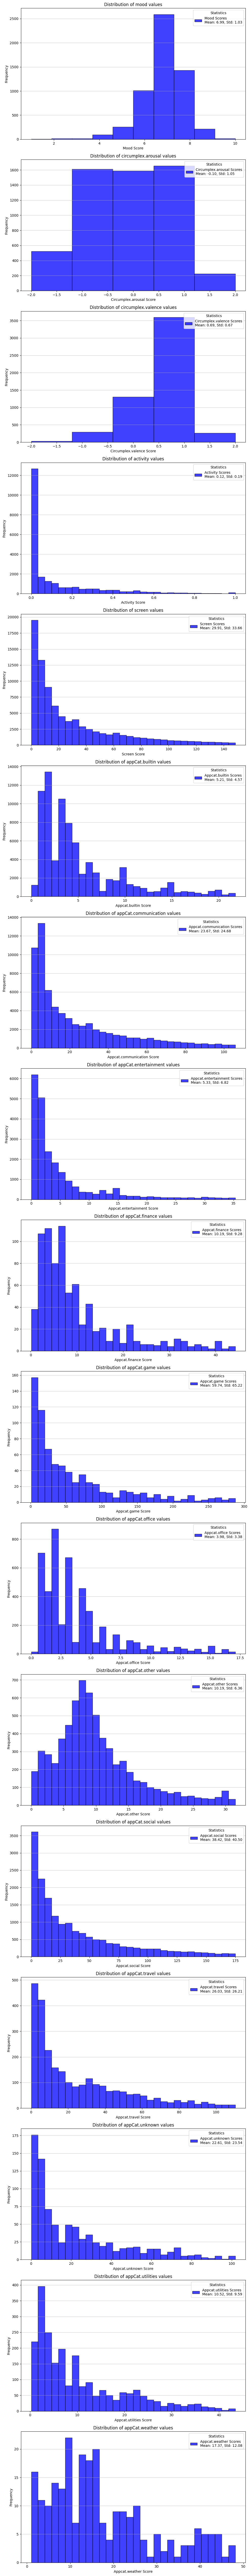

In [16]:
plot_vars_dist(df)

When comparing the histograms with those created before the cleaning, we no longer have few very high frequency bins and small bins extremely far away.

#### Imputing missing values

##### Insights into missing values

In [17]:
def plot_missing_values_heatmap(df):
    # Group the data by 'id' and 'variable' and count NaN values for each grouping
    nan_counts = df.groupby(['id', 'variable']).apply(lambda x: x['value'].isnull().sum()).reset_index(name='Missing Values')

    # Determine the total possible records for each user-variable combination
    total_possible_records = df.groupby(['id', 'variable']).size().reset_index(name='Total Records')

    # Merge the count of NaN values with the total possible records to calculate percentages
    merged_counts = pd.merge(nan_counts, total_possible_records, on=['id', 'variable'])
    merged_counts['Missing Percentage'] = (merged_counts['Missing Values'] / merged_counts['Total Records']) * 100

    # Pivot the results to show the percentage of missing values: users on rows, variables on columns
    nan_percentage_pivot = merged_counts.pivot(index='id', columns='variable', values='Missing Percentage').fillna(0)

    # Plotting the heatmap of missing value percentages
    plt.figure(figsize=(12, 8))
    sns.heatmap(nan_percentage_pivot, annot=True, fmt=".1f", cmap='viridis')
    plt.title('Heatmap of Percentage (%) of Missing Values by User and Variable')
    plt.xlabel('Variable')
    plt.ylabel('User ID')
    plt.show()

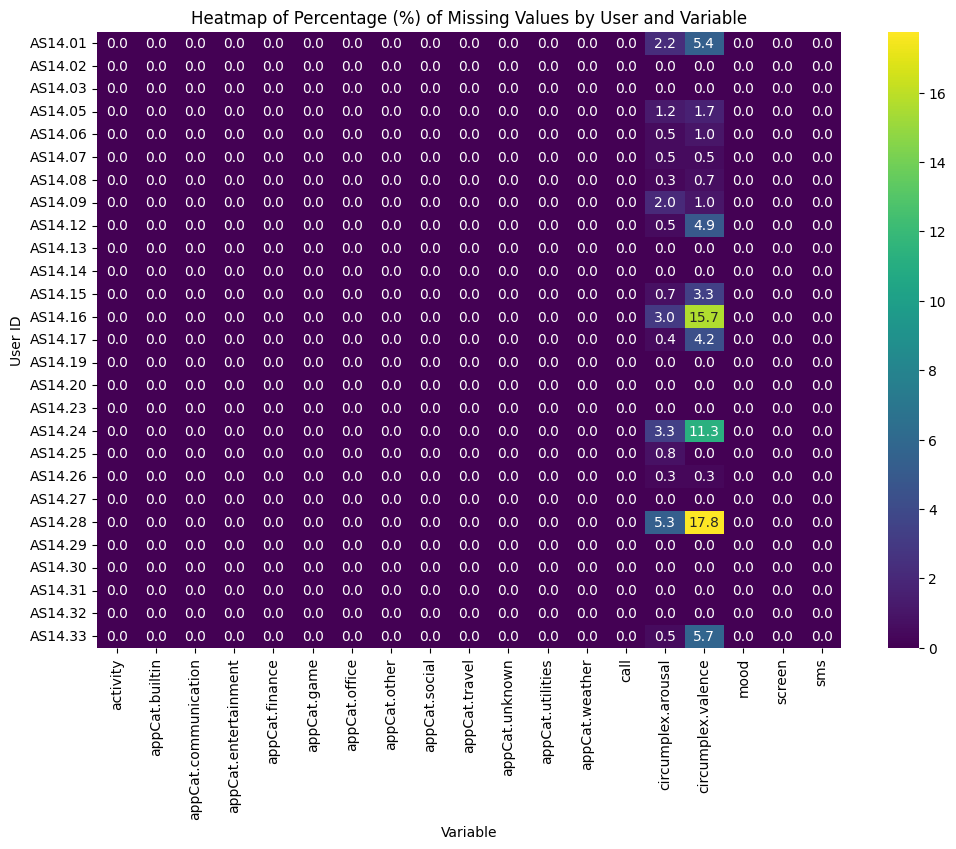

In [18]:
plot_missing_values_heatmap(df)

Based on this heatmap, we see that NaN values only occur for the circumplex variables, most notably for valence. Furthermore, only a small subset of the participants have missing values.

In [19]:
def plot_var_for_ids(df, user_ids, variable):
    # Filter the data for the given user IDs and variable
    user_data = df[(df['id'].isin(user_ids)) & (df['variable'] == variable)]

    plt.figure(figsize=(12, 6))
    for user_id in user_ids:
        subset = user_data[user_data['id'] == user_id]
        plt.plot(subset['time'], subset['value'], label=f'User {user_id}', marker='o', markersize=4, linestyle='-')

    plt.title(f'{variable} for {", ".join(user_ids)}')
    plt.xlabel('Time')
    plt.ylabel(variable)
    plt.xticks(rotation=45)
    plt.legend(title='User ID')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

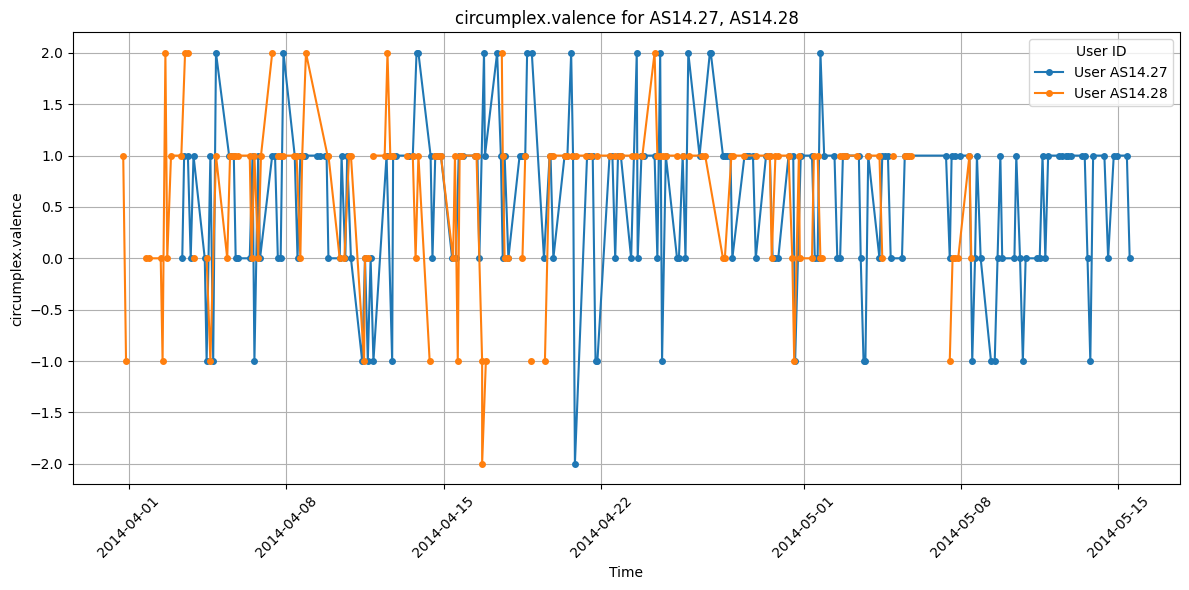

In [20]:
plot_var_for_ids(df, ['AS14.27', 'AS14.28'], 'circumplex.valence')

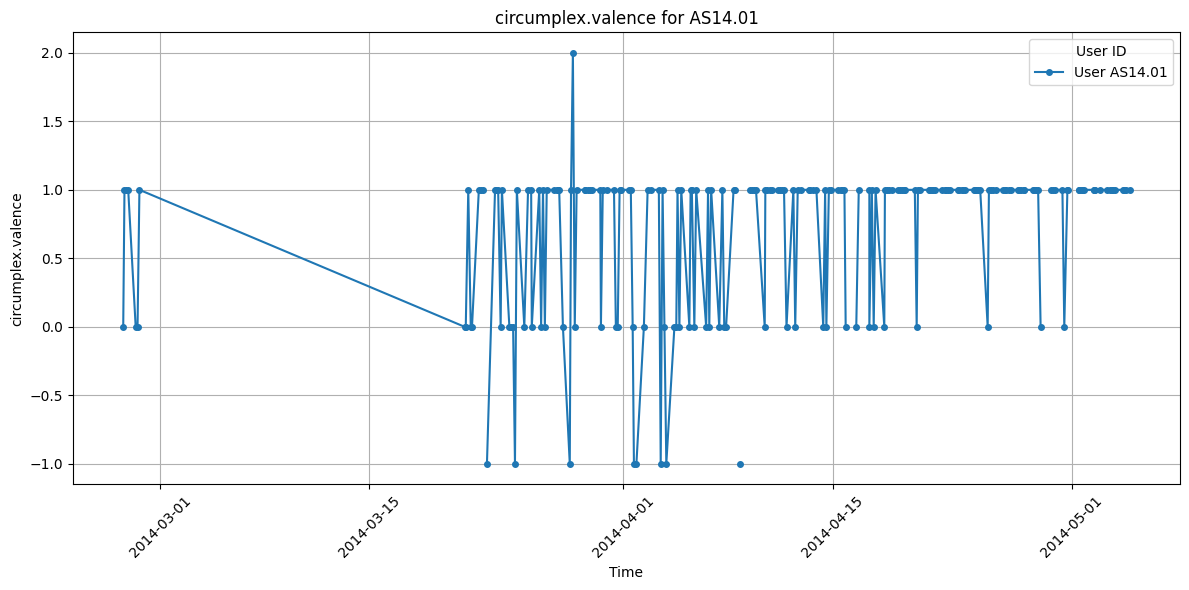

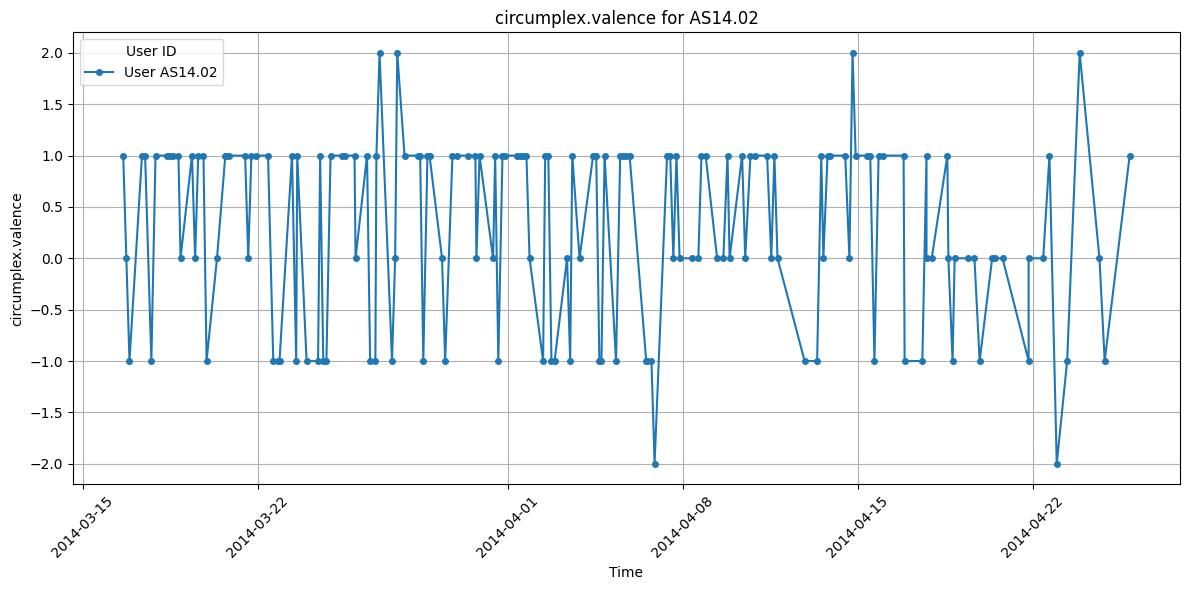

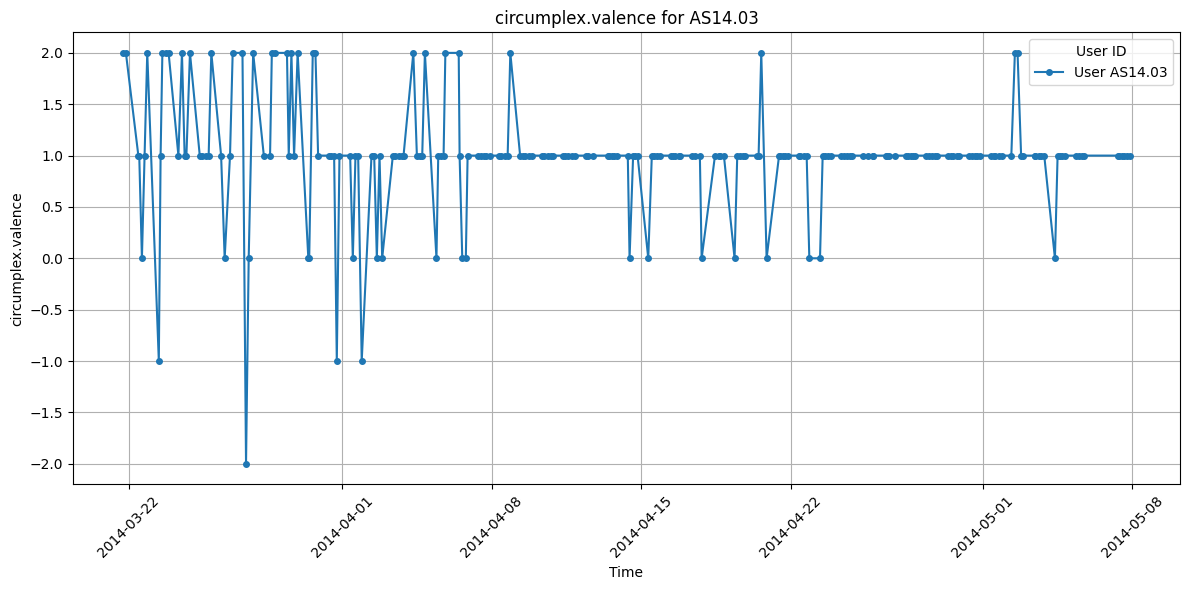

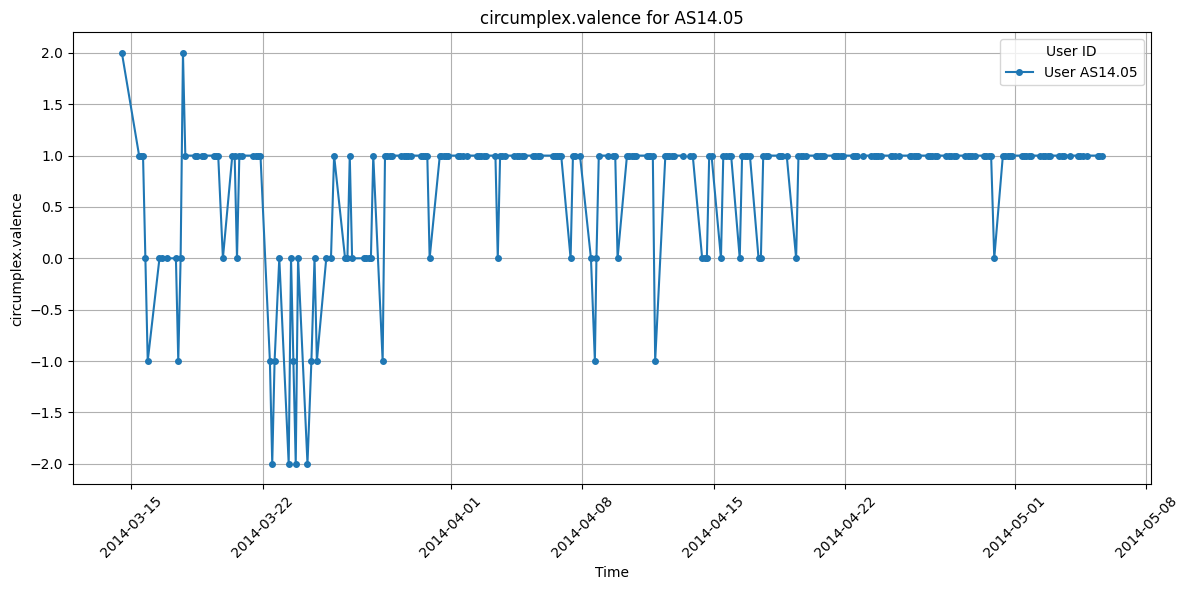

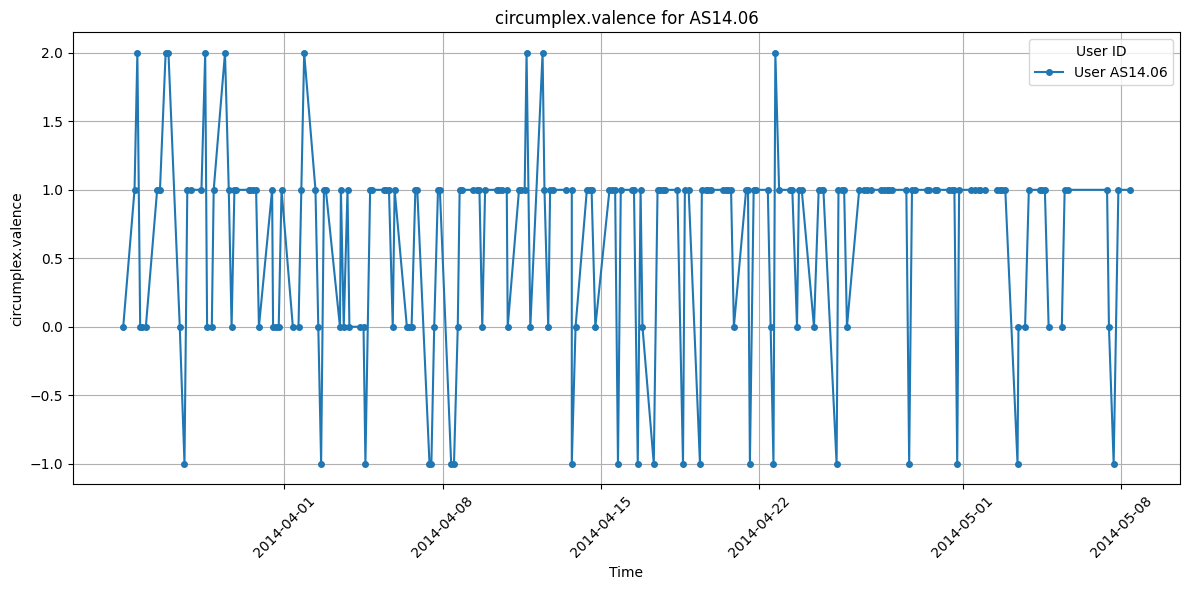

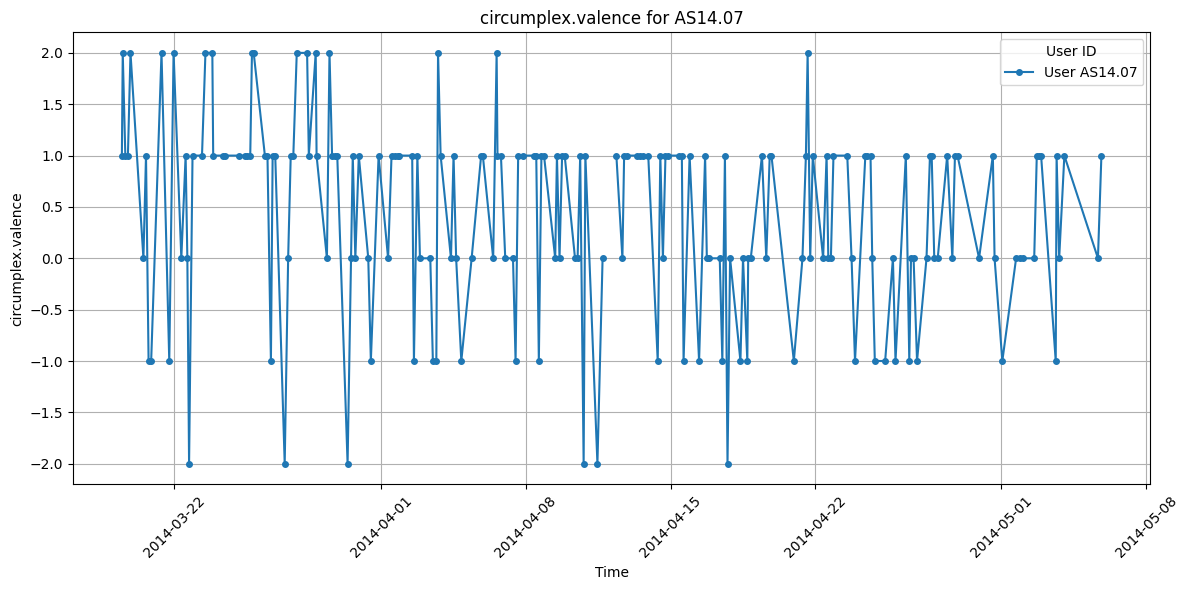

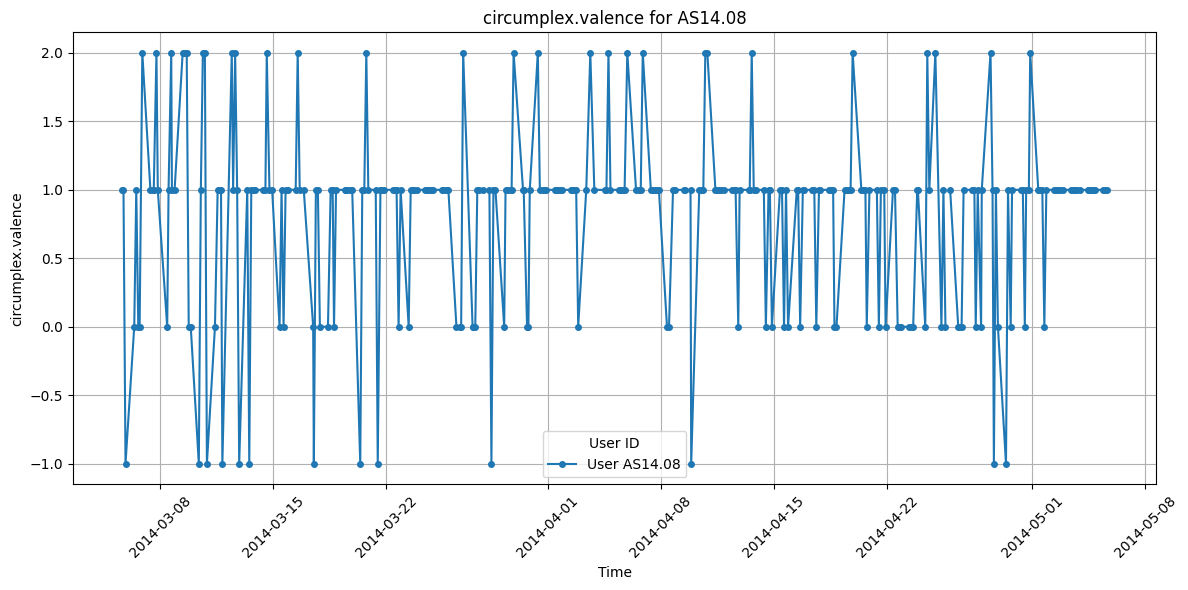

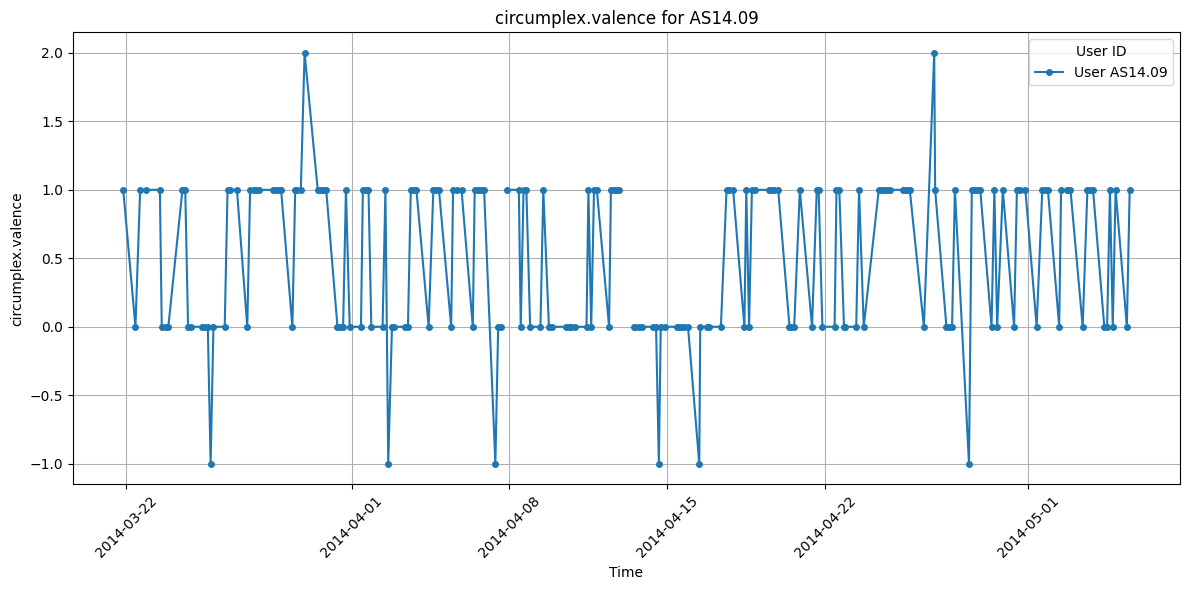

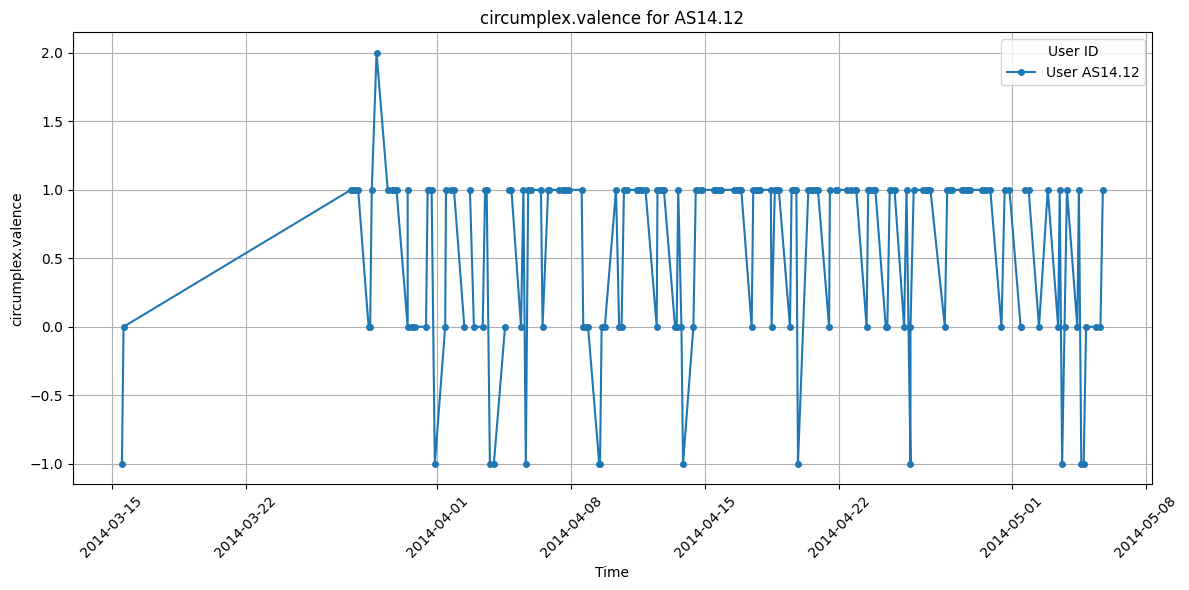

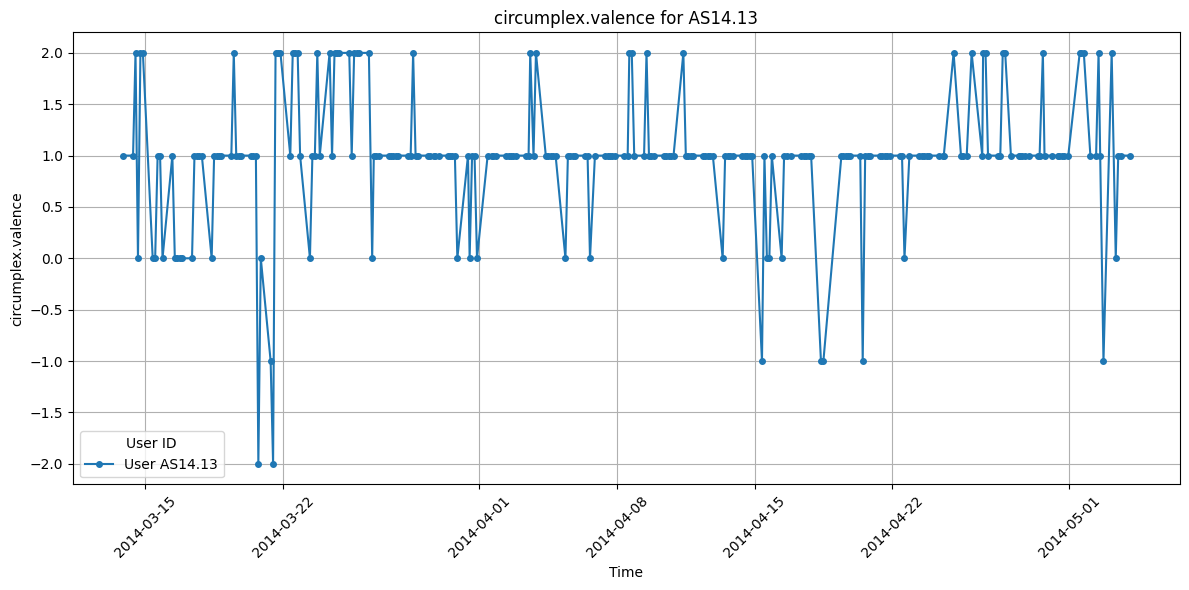

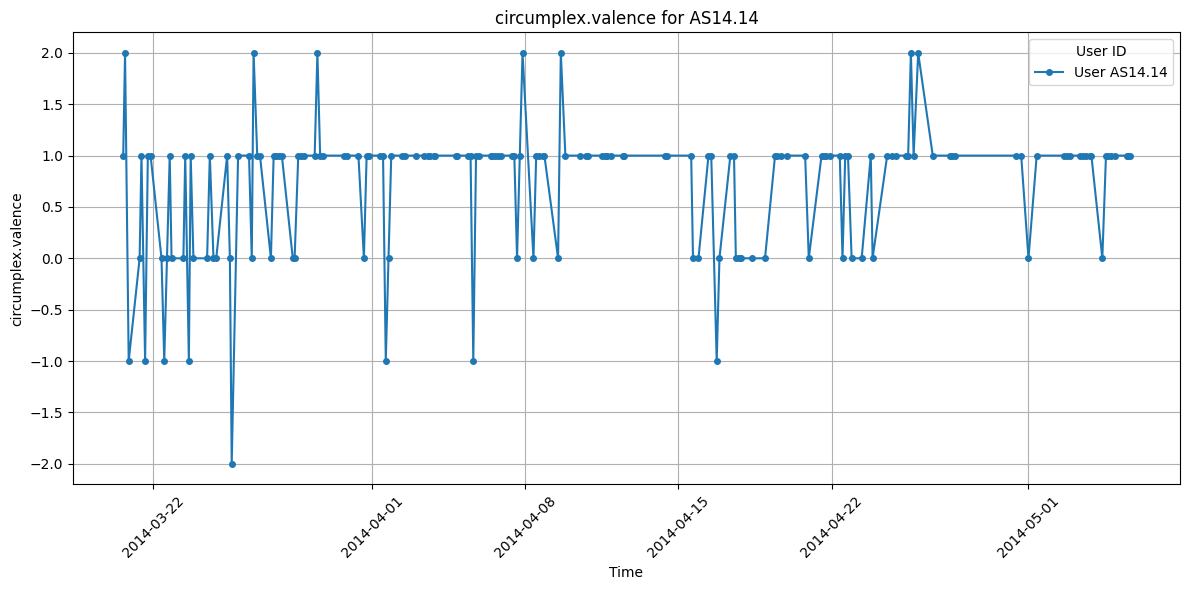

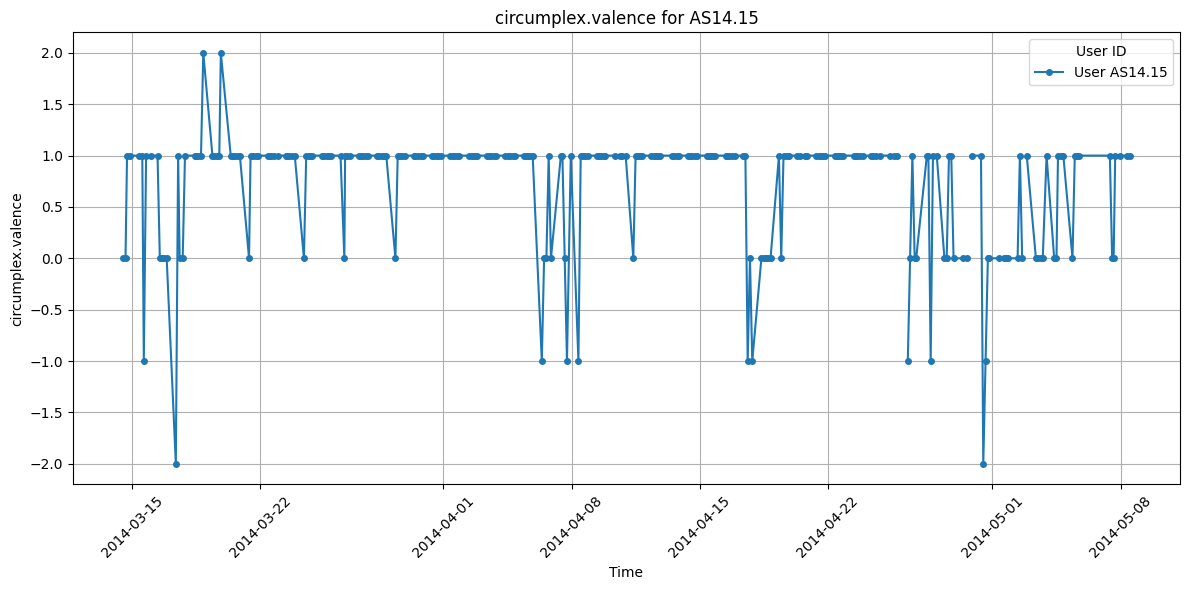

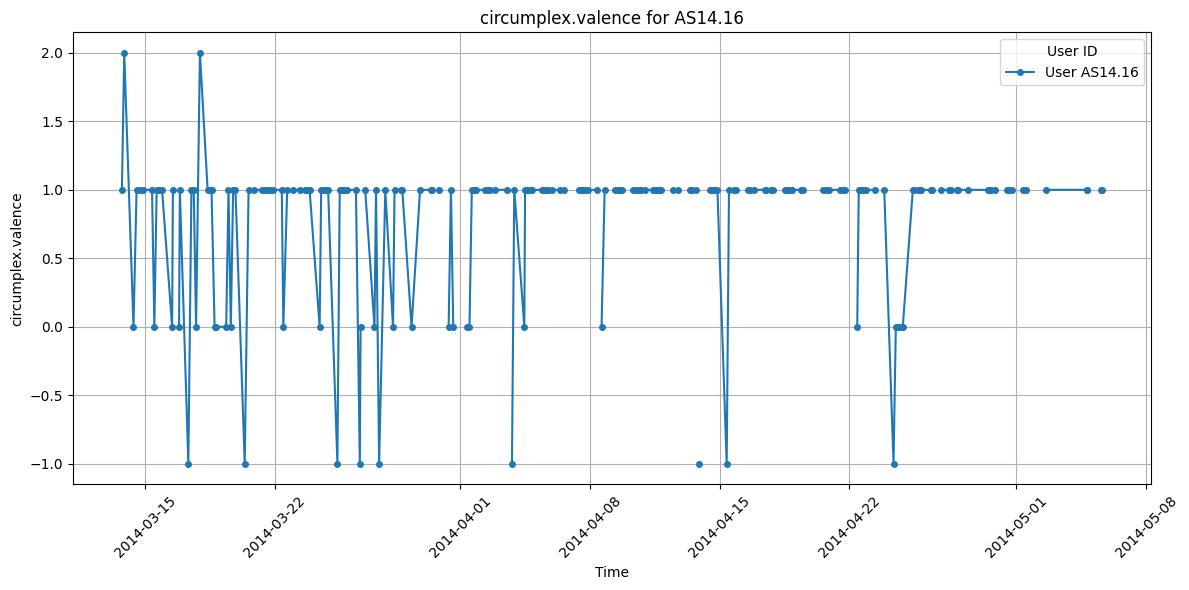

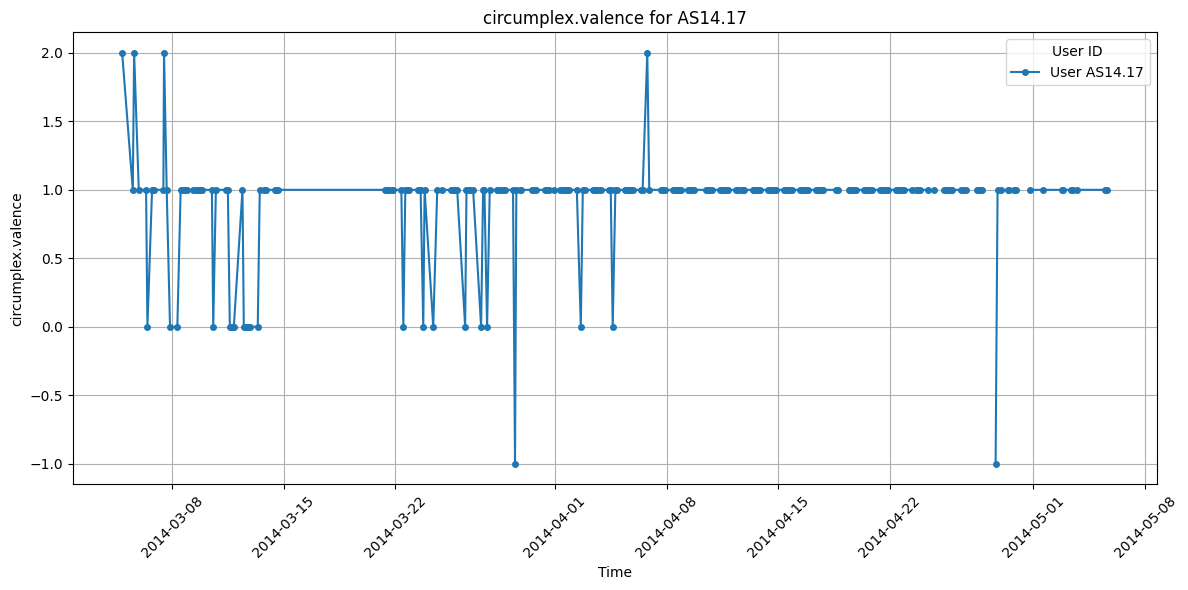

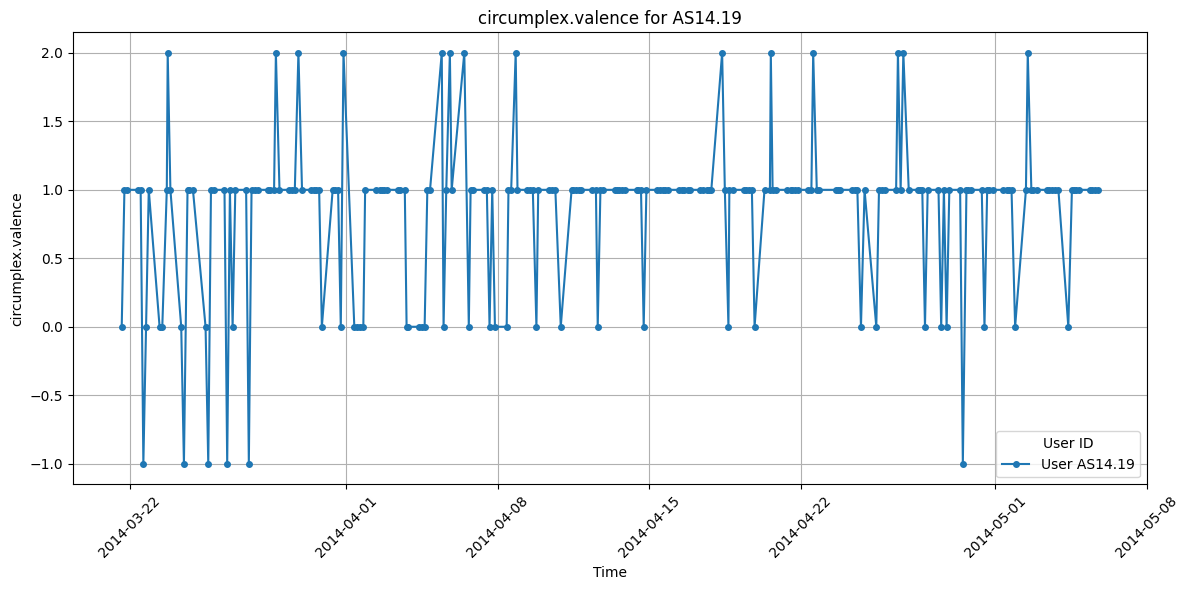

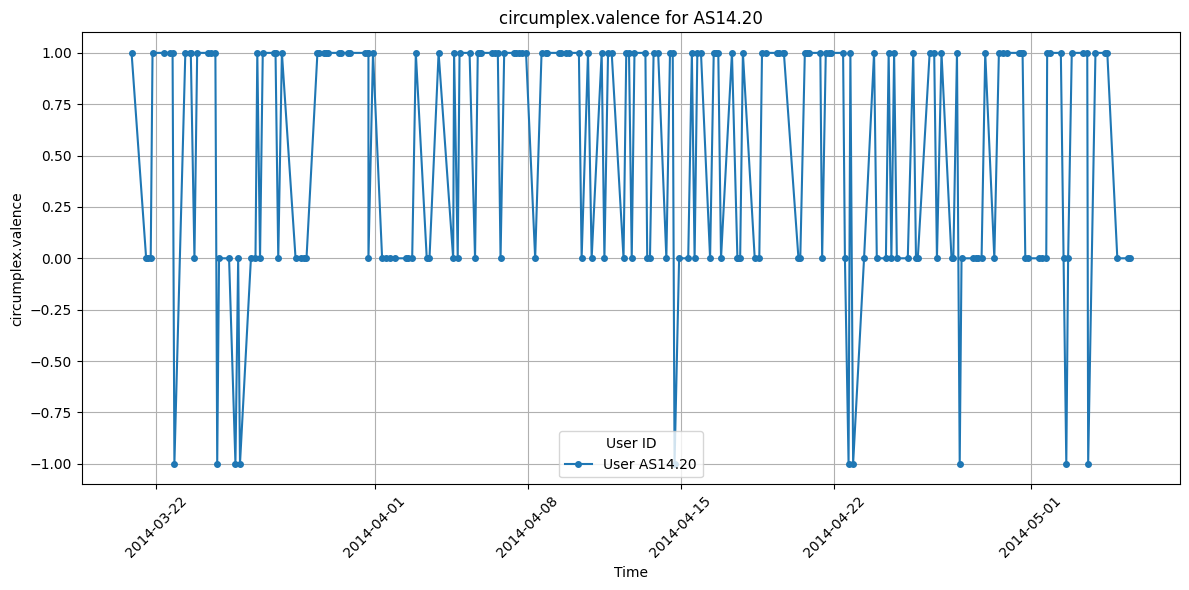

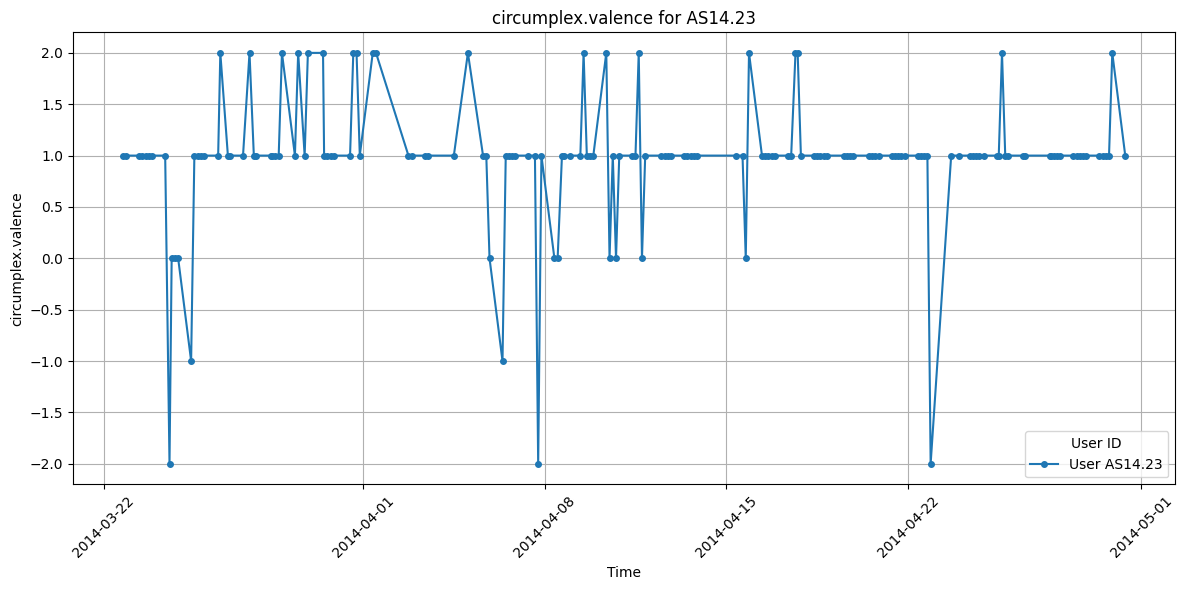

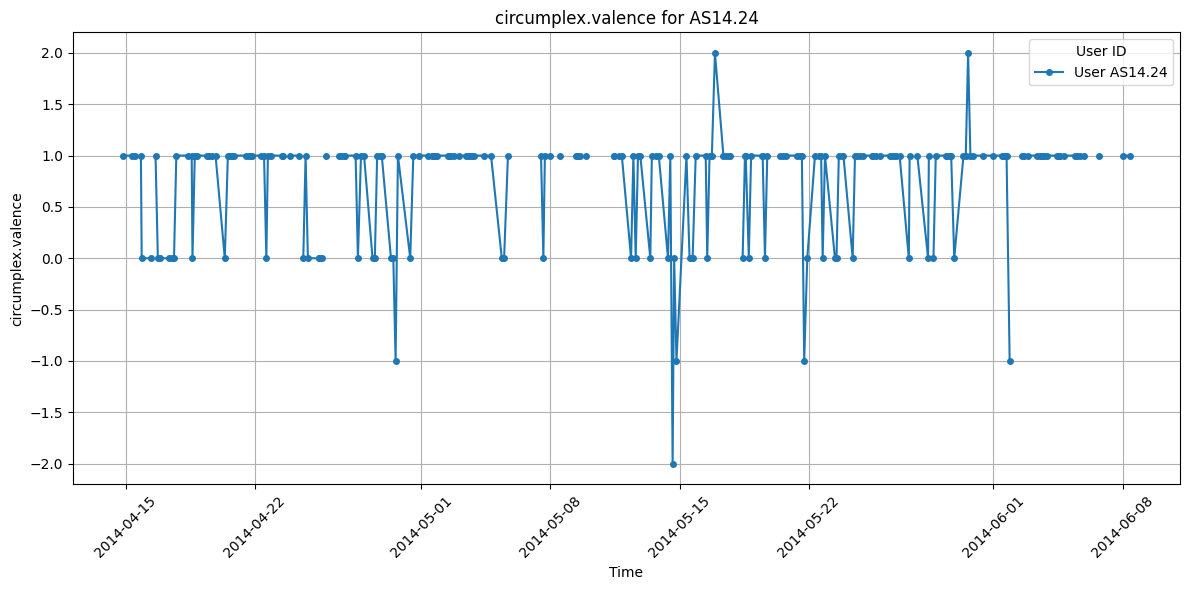

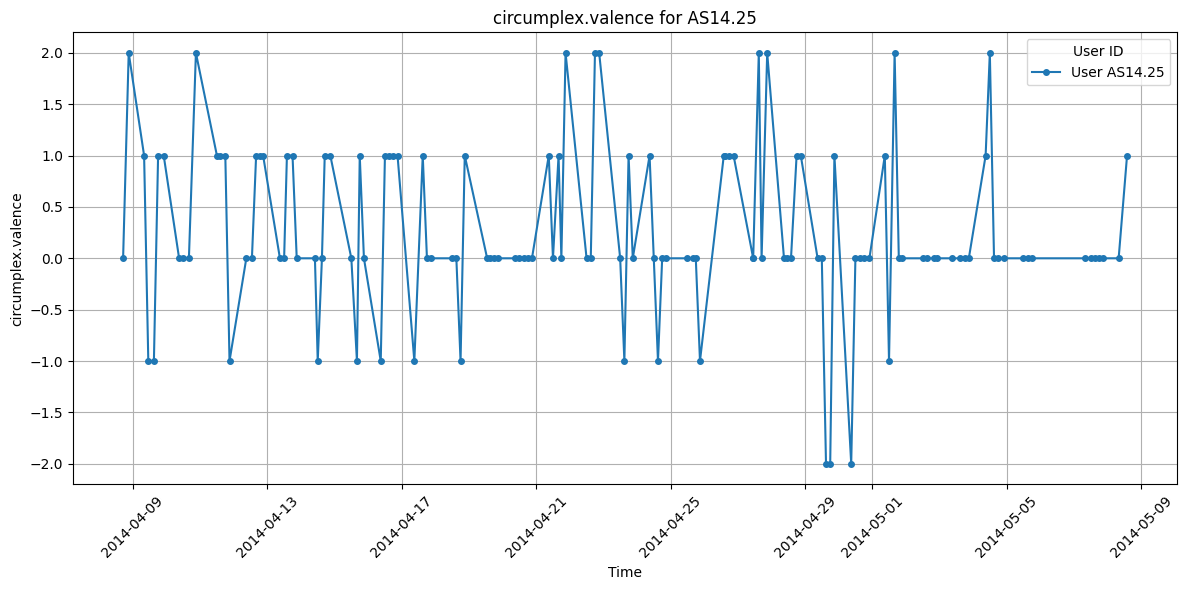

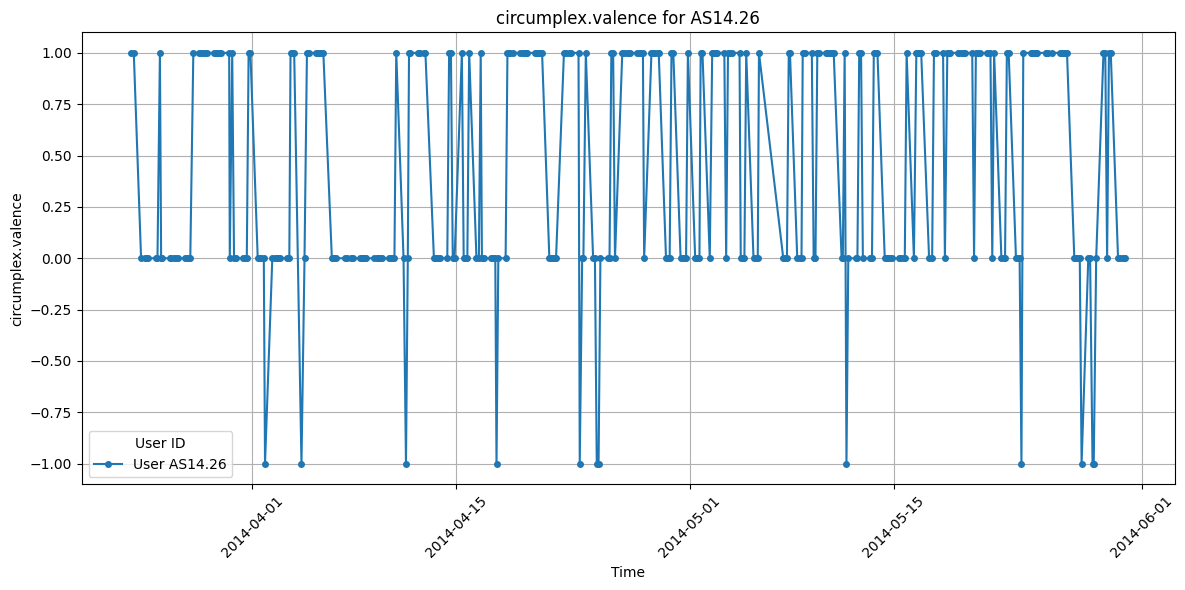

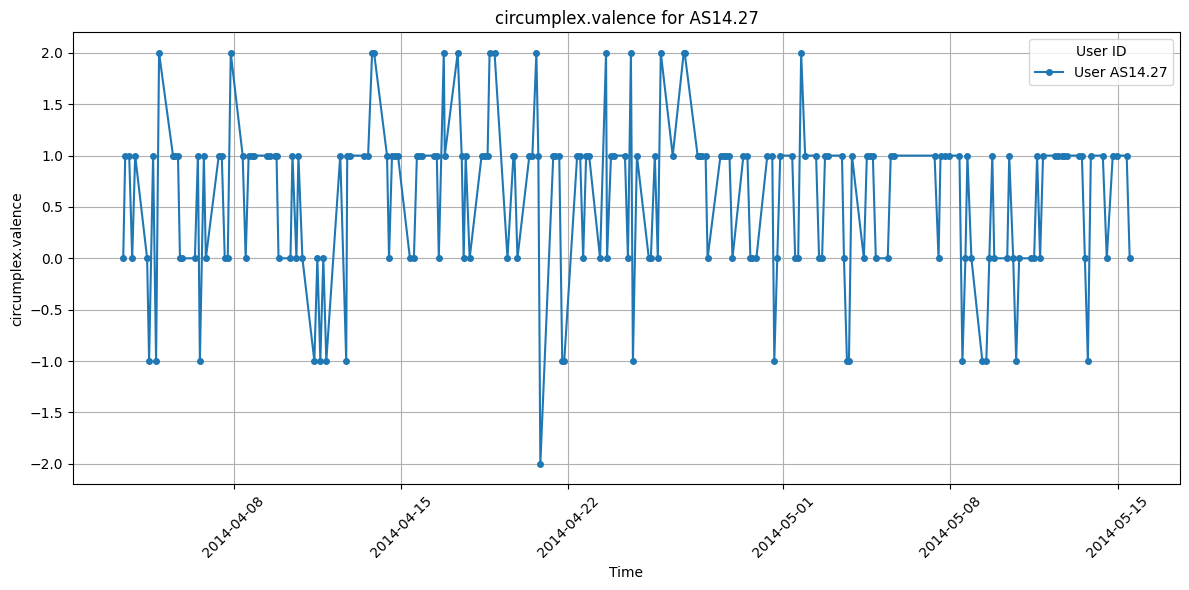

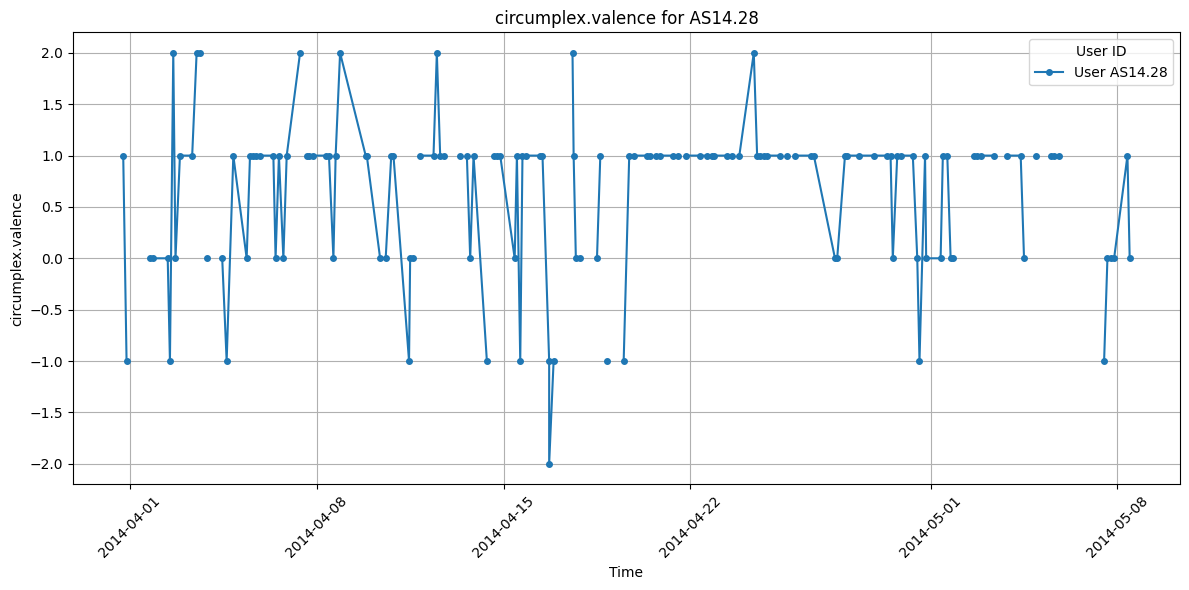

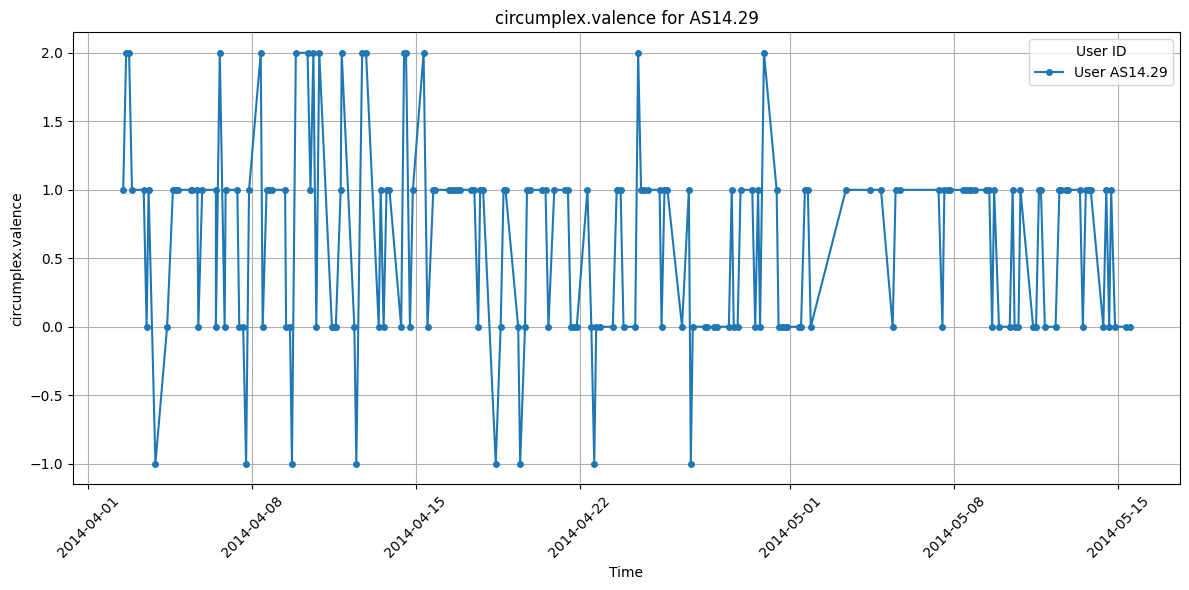

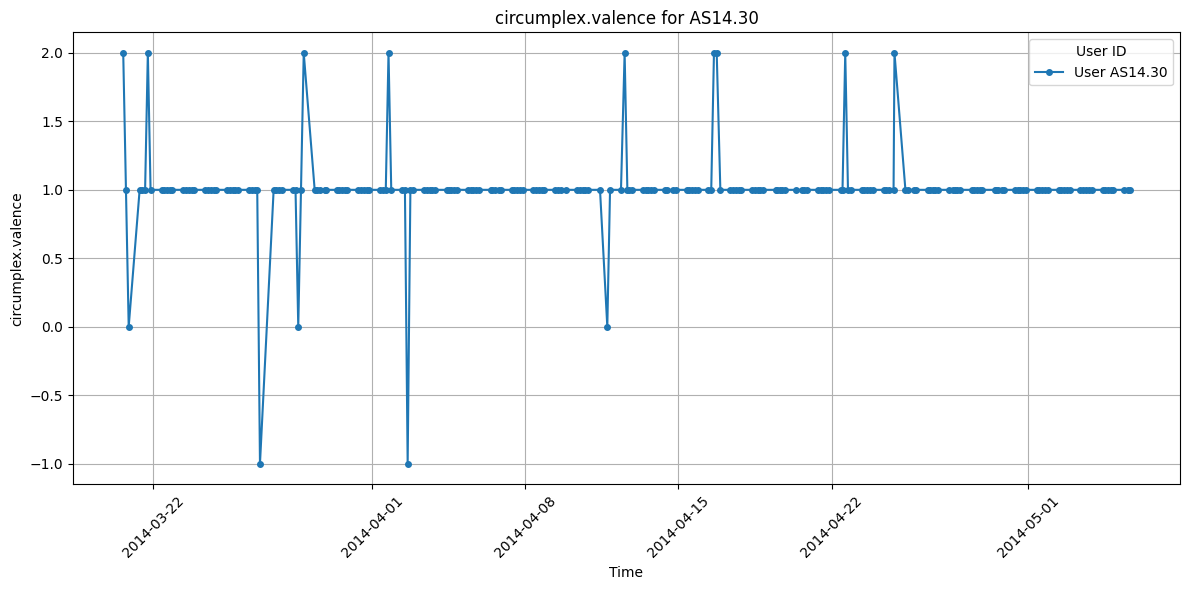

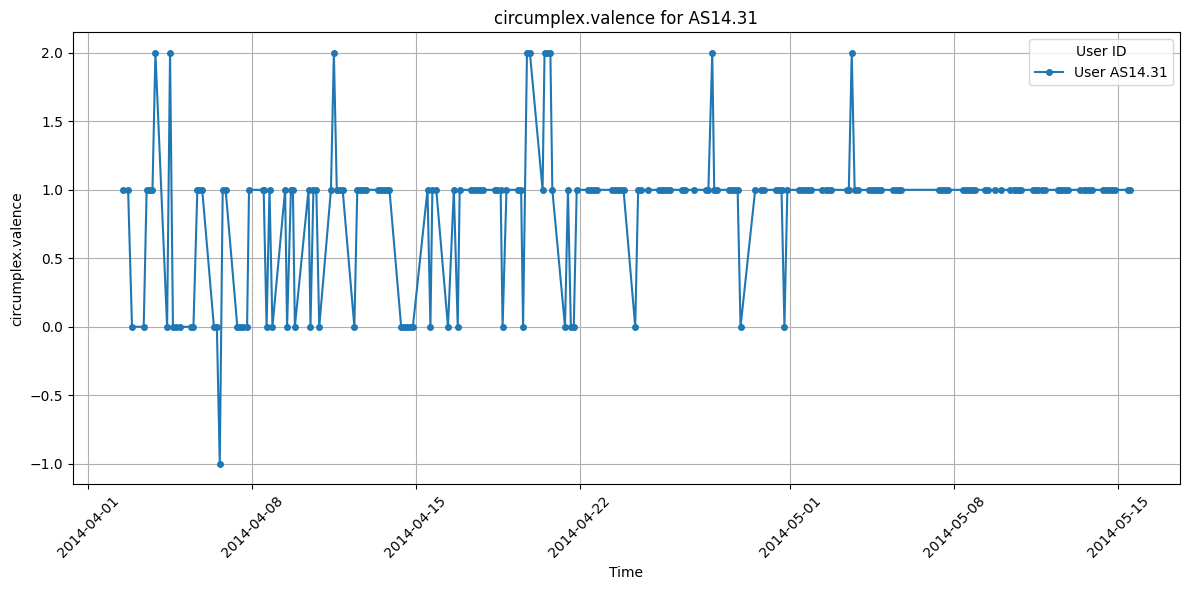

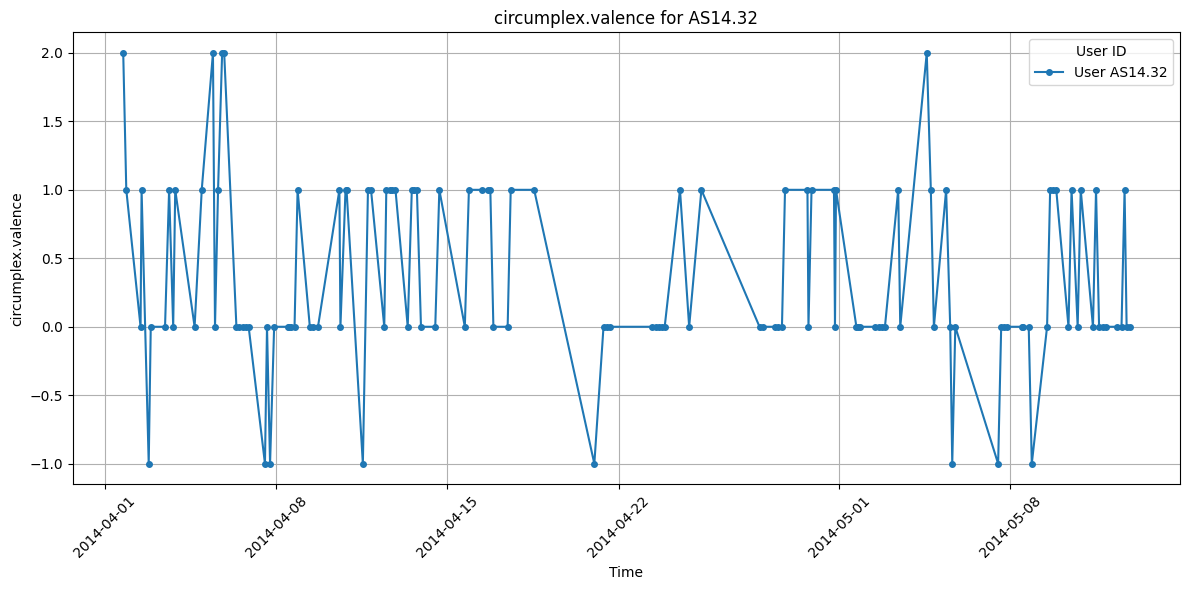

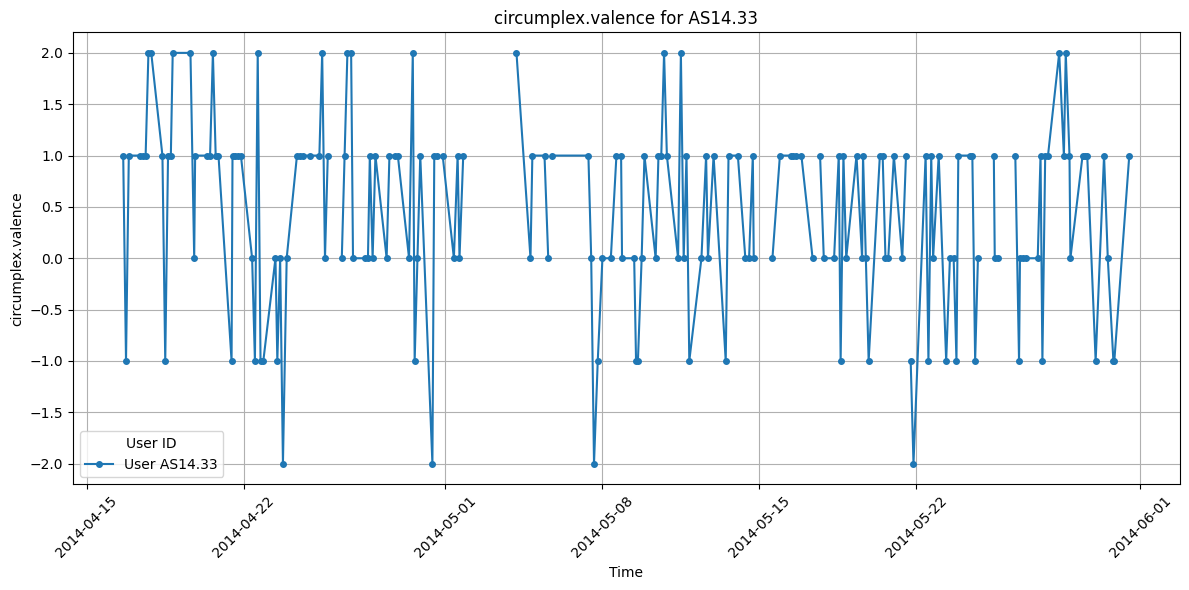

In [21]:
for user in df['id'].unique():
    plot_var_for_ids(df, [user], 'circumplex.valence')

Two common approaches for imputing missing values in time series data are:
1. Mode: For a given user and variable, the most common value for that variable is used to impute the missing values.
2. Linear Interpolation: This method assumes that the change between two data points is linear and imputes the values accordingly.

We will apply both methods and then discuss which one might be more suitable.

##### Functions to impute time-series values

In [22]:
def impute_locf(group):
    return group.fillna(method='ffill')

def impute_mode(group):
    return group.fillna(group.mode().iloc[0])

def impute_linear(group):
    return group.interpolate(method='linear')

def apply_imputation(df, impute_function):
    df.sort_values(by=['id', 'time', 'variable'], inplace=True)  # sort the data by id, time and variable

    # Group by 'id' and 'variable', then apply imputation
    imputed_df = df.groupby(['id', 'variable']).apply(impute_function).reset_index(drop=True)
    
    # Create an indicator column to identify originally missing values
    was_missing = df['value'].isna()
    
    # Mark the values that were imputed
    imputed_df['imputed'] = was_missing & imputed_df['value'].notna()
    
    return imputed_df

##### Imputing missing values and comparing

In [23]:
# Apply Mode Imputation
df_mode = apply_imputation(df.copy(), impute_mode)

# Apply Linear Interpolation
df_linear = apply_imputation(df.copy(), impute_linear)

In [24]:
def plot_imputation_comparison(df, df_1, df_2, participant, variable):
    # Extract the series for the selected participant and variable
    original_series = df[(df['id'] == participant) & (df['variable'] == variable)]
    locf_series = df_1[(df_1['id'] == participant) & (df_1['variable'] == variable)]
    linear_series = df_2[(df_2['id'] == participant) & (df_2['variable'] == variable)]

    # Plotting the series to compare
    plt.figure(figsize=(15, 5))
    plt.plot(original_series['time'], original_series['value'], label='Original', marker='o', linestyle='', markersize=5)
    plt.plot(locf_series['time'], locf_series['value'], label='Mode', marker='', linestyle='-', linewidth=2)
    plt.plot(linear_series['time'], linear_series['value'], label='Linear Interpolation', marker='', linestyle='--', linewidth=2)
    plt.title('Comparison of Imputation Methods')
    plt.xlabel('Time')
    plt.ylabel(variable.capitalize())
    plt.yticks(range(-2, 3, 1))
    plt.legend()
    plt.grid()
    plt.show()

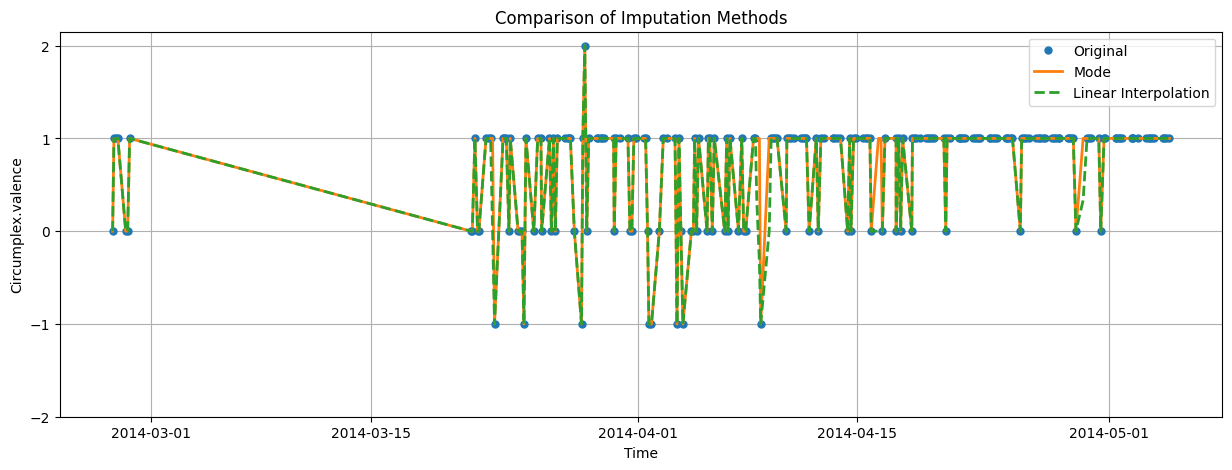

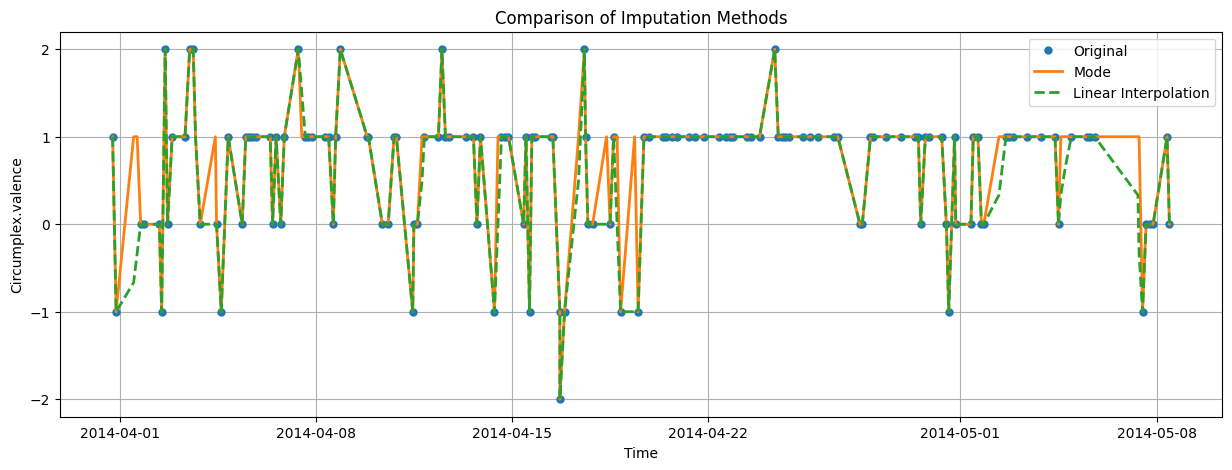

In [25]:
plot_imputation_comparison(df, df_mode, df_linear, 'AS14.01', 'circumplex.valence')
plot_imputation_comparison(df, df_mode, df_linear, 'AS14.28', 'circumplex.valence')

Based on the above plots, we can see that both methods impute NaN values to fill gaps in our data. While the mode method is more conservative and keeps the original shape of the data, the linear interpolation method introduces values that are not necessarily seen in our dataset (e.g. fractional values), but it creates smoother transitions between readings.

In the interest of maintaining the original shape of the data, we will use the mode method to impute missing values.

In [26]:
df = df_mode
df

id                    time  variable     value  imputed
0       AS14.01 2014-03-20 22:00:00.000  activity  0.071429    False
1       AS14.01 2014-03-20 23:00:00.000  activity  0.091667    False
2       AS14.01 2014-03-21 00:00:00.000  activity  0.008333    False
3       AS14.01 2014-03-21 01:00:00.000  activity  0.000000    False
4       AS14.01 2014-03-21 02:00:00.000  activity  0.000000    False
...         ...                     ...       ...       ...      ...
341438  AS14.33 2014-05-26 14:42:25.733       sms  1.000000    False
341439  AS14.33 2014-05-27 10:52:19.687       sms  1.000000    False
341440  AS14.33 2014-05-27 10:56:27.632       sms  1.000000    False
341441  AS14.33 2014-05-28 19:21:19.711       sms  1.000000    False
341442  AS14.33 2014-05-29 23:07:30.677       sms  1.000000    False

[341443 rows x 5 columns]

##### Handling prolonged periods of missing data

In [ ]:
# def check_for_prolonged_gaps(df, date_col, min_gap):
#     # Group the dataframe by 'id' and 'variable' and identify the gaps
#     gaps_df = df.groupby(['id', 'variable'])['time'].apply(lambda x: x.diff().gt(min_gap)).reset_index(name='gap')
#     return gaps_df

In [ ]:
# min_gap = '7D'  # We define a gap of 7 days as prolonged
# gaps_df = check_for_prolonged_gaps(df, 'time', min_gap)

In [ ]:
# from sklearn.linear_model import LinearRegression
# import numpy as np

# def impute_with_linear_regression(series, date_col):
#     """
#     Impute missing values using Linear Regression for a given time series.

#     Parameters:
#     series (DataFrame): DataFrame with time as index and values to impute.
#     date_col (str): The column name of the DataFrame that contains the datetime values.

#     Returns:
#     DataFrame: DataFrame with missing values imputed.
#     """
#     # Prepare the data
#     # Convert the datetime to ordinal for regression purposes
#     X = np.array([d.toordinal() for d in series.index]).reshape(-1, 1)
#     y = series.values

#     # Fit the linear regression model
#     model = LinearRegression()
#     model.fit(X, y)
    
#     # Predict the values for the entire series index
#     predicted_values = model.predict(X)
    
#     # Return the predicted values in the original index
#     predicted_series = pd.Series(predicted_values.flatten(), index=series.index)
#     return predicted_series

In [ ]:
# def fill_prolonged_gaps(df, gaps_df, freq='D'):
#     """
#     Fill prolonged gaps in the dataframe using Linear Regression predictions.

#     Parameters:
#     df (DataFrame): DataFrame with initial imputation done (NaN values filled).
#     gaps_df (DataFrame): DataFrame indicating where the prolonged gaps are.
#     'time' (str): Name of the column containing date information. XXXXX
#     freq (str): Frequency of the expected data records (e.g., 'D' for daily)

#     Returns:
#     DataFrame: DataFrame with prolonged gaps filled.
#     """
#     for _, row in gaps_df[gaps_df['gap']].iterrows():
#         user = row['id']
#         variable = row['variable']
#         # Identify the actual start and end of the gap
#         gap_start = row['time']
#         next_record = gaps_df[(gaps_df['id'] == user) & 
#                               (gaps_df['variable'] == variable) & 
#                               (gaps_df['time'] > gap_start)]['time'].min()
        
#         # If there's a next record, predict for the gap, otherwise, predict until the end of the dataset
#         gap_end = next_record if pd.notnull(next_record) else df['time'].max()
        
#         # Generate the full time index for the gap and perform the imputation
#         gap_time_index = pd.date_range(start=gap_start, end=gap_end, freq=freq, closed='left')
#         if not gap_time_index.empty:
#             # Get non-missing data for the user and variable to fit the model
#             non_missing_series = df[(df['id'] == user) & 
#                                     (df['variable'] == variable) & 
#                                     (df['time'] < gap_start)]
#             # Impute with linear regression
#             predicted_values = impute_with_linear_regression(non_missing_series.set_index('time'), 'time')
#             # Fill the gap with the predicted values
#             df = df.append(pd.DataFrame({
#                 'id': user,
#                 'variable': variable,
#                 'time': gap_time_index,
#                 'value': predicted_values[gap_time_index]
#             }), ignore_index=True)
    
#     # Sort the dataframe after filling the gaps
#     df.sort_values(by=['id', 'variable', 'time'], inplace=True)
#     return df

In [ ]:
# # Apply the function to fill prolonged gaps
# df = fill_prolonged_gaps(df, gaps_df)
# df

## Start on basic predicition

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, LSTM, ZeroPadding1D, Masking

# # NOTE: this is still little basic format for the model, will maybe have to run on Google colab?


# x = df # input features
# y = df[df['variable'] == 'mood'] # target

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# # Transform data 
# scaler = StandardScaler()
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test)

# x_train_reshaped = x_train_scaled.reshape(x_train_scaled.shape[0], x_train_scaled.shape[1], 1)
# x_test_reshaped = x_test_scaled.reshape(x_test_scaled.shape[0], x_test_scaled.shape[1], 1)

# # Define the CNN model, three layers
# model = Sequential([
#     Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(x_train_reshaped.shape[1], 1)),
#     MaxPooling1D(pool_size=2),
#     Conv1D(filters=64, kernel_size=3, activation='relu'),
#     MaxPooling1D(pool_size=2),
#     Conv1D(filters=128, kernel_size=3, activation='relu'),
#     MaxPooling1D(pool_size=2),
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dense(1, activation='linear')
# ])

# model.compile(optimizer='adam', loss='mean_squared_error')

# model.fit(x_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(x_test_reshaped, y_test))

# loss = model.evaluate(x_test_reshaped, y_test)
# print(f'Test loss: {loss}')

# predictions = model.predict(x_test_reshaped)

In [ ]:
entertainment_vars =  ['appCat.entertainment', 'appCat.game', 'appCat.social']
util_vars =  ['appCat.builtin', 'appCat.communication', 'appCat.travel', 'appCat.utilities', 'appCat.weather']
other_vars =  ['appCat.other', 'appCat.office', 'appCat.finance']

In [ ]:
for variable in entertainment_vars:
    df.loc[df['variable'] == variable, 'variable'] = 'entertainment'
for variable in util_vars:
    df.loc[df['variable'] == variable, 'variable'] = 'util'
for variable in other_vars:
    df.loc[df['variable'] == variable, 'variable'] = 'other'

In [ ]:
#df = df.drop([''],axis = 1)
df['time'] = pd.to_datetime(df['time'])
df_LSTM  = df
df_LSTM['time'] = pd.to_datetime(df_LSTM['time'])
df_LSTM['time'] = df_LSTM['time'].dt.date
df_LSTM = df_LSTM[df_LSTM['variable'] == 'mood']
#df_mood = df[df['variable'] == 'mood']
#df_mood['time'] = df_mood['time'].dt.date
#df_mood['time'] = df_mood['time'].astype("string")

In [ ]:
# This code averages mood over the day for feature engineering

df['time'] = pd.to_datetime(df['time'])
values = df.groupby(['id','variable',df['time'].dt.date])
first_mood_of_day = pd.DataFrame(columns=['id', 'time', 'variable', 'value'])
for group in values.groups.keys():
    group_df = values.get_group(group).reset_index()
    if(len(group_df[group_df['variable'] == 'mood']) > 0):
        first_mood_of_day.loc[len(first_mood_of_day.index)] = group_df[group_df['variable'] == 'mood'].loc[0]

In [ ]:
first_mood_of_day['time'] = pd.to_datetime(first_mood_of_day['time'], format='%d%b%Y:%H:%M:%S.%f')
first_mood_of_day['time'] = first_mood_of_day['time'].dt.date
#first_mood_of_day = first_mood_of_day.drop(['variable'],axis = 1)
first_mood_of_day = first_mood_of_day.rename(columns={"value": "mood"})
first_mood_of_day['time'] = first_mood_of_day['time'].astype('string')
average_mood_per_day = first_mood_of_day.groupby('time')['mood'].mean().reset_index()

print(average_mood_per_day)

In [ ]:
counts = df.groupby(['id','variable',df['time'].dt.date]).size()
counts = counts.reset_index()
counts

In [ ]:
values = df.groupby(['id','variable',df['time'].dt.date])['value'].sum()
values = values.reset_index()
values['value'] = values['value'].astype(float)
values['time'] = values['time'].astype("string")
values

In [ ]:
mean_variables = ['mood', 'circumplex.arousal','circumplex.valence' ]
for i in range(len(counts)):
    if(counts.loc[i,'variable'] in mean_variables):
        values.loc[i,'value'] = values.loc[i,'value'] / counts.loc[i,0]

In [ ]:
columns_new = ['id','day', 'mood', 'circumplex.arousal','circumplex.valence', 'activity', 'screen', 'call', 'sms','entertainment', 'util', 'other']
feature_engineered_df = pd.DataFrame(columns = columns_new)

In [ ]:
for user in pd.unique(values['id']):
    for day in pd.unique(values['time']):
        new_values = values[(values['id'] == user)&(values['time'] == day)]
        if(new_values.empty == False):
            new_row = []
            for column  in feature_engineered_df:
                if column in pd.unique(new_values['variable']):
                    new_row.append(list(new_values.loc[new_values['variable'] == column,'value'])[0])
                else:
                    new_row.append(-10)
            new_row[0] = user
            new_row[1] = day
            feature_engineered_df.loc[len(feature_engineered_df.index)] = new_row
feature_engineered_df['day'] = pd.to_datetime(feature_engineered_df['day'])
feature_engineered_df['mood_average'] = np.round(feature_engineered_df['mood'])
feature_engineered_df

LSTM

In [ ]:
labels = []
final_features = []
df_LSTM['time'] = pd.to_datetime(df_LSTM['time'])
df_LSTM_grouped = df_LSTM.groupby(['id', df_LSTM['time'].dt.date])
for group in df_LSTM_grouped.groups.keys():
    group_df = df_LSTM_grouped.get_group(group).reset_index()
    group_df['time'] = pd.to_datetime(group_df['time'])
    next_day = group_df.loc[0]['time'].date() + pd.DateOffset(1)
    next_day_df = feature_engineered_df[(feature_engineered_df['id'] == group[0] )& (feature_engineered_df['day'] == next_day)]
    if(len(next_day_df)> 0):
        print(next_day_df)
        if(next_day_df['mood_average'][next_day_df.index[0]] == -10):
            continue
            
        labels.append(next_day_df['mood_average'][next_day_df.index[0]])
        final_features.append(group_df['value'].tolist())
    else:
        continue
        

In [ ]:
max = 0
for features in final_features:
    if(len(features) > max):
        max = len(features)
for features in final_features:
    zeros_needed = max - len(features)
    for i in range(zeros_needed):
        features.insert(0,0)

In [ ]:
final_features = np.array(final_features)
from sklearn.preprocessing import OneHotEncoder
label_encoder = OneHotEncoder()
labels = np.array(labels)
temp_labels = labels.reshape(((len(labels),1)))
label_encoder.fit(temp_labels)
temp_labels = label_encoder.transform(temp_labels)
temp_labels = temp_labels.toarray()

In [ ]:
len(final_features)

In [ ]:
len(labels)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( final_features, temp_labels, test_size=0.20, random_state=42)

In [ ]:
# define model
model = Sequential()
model.add(Masking(mask_value=0.,
               input_shape=(6, 1)))
model.add(LSTM(100, activation='tanh',
               input_shape=(6, 1)))
model.add(Dense(len(y_train[0]),activation = 'softmax' ))
model.compile(optimizer='adam', loss = ['categorical_crossentropy'], metrics=['accuracy'])
# model.build((6, 1))
model.summary()
model.fit(X_train,y_train, epochs=300)

In [ ]:
cats = label_encoder.categories_
test_predictions = []
#Select last n_input values from the train data
#Label = 6
for entry in X_test:
    print(entry)
    pred = model.predict(np.array([entry]))
    cat_index = np.argmax(pred)
    print(f'prediction:{cats[0][cat_index]}')
    test_predictions.append(cats[0][cat_index])

In [ ]:
label_test = []
for y in y_test:
    cat_index = np.argmax(y)
    label_test.append(cats[0][cat_index])
from sklearn.metrics import accuracy_score
print(f'test accuracy:{accuracy_score(label_test, test_predictions)}')

Random Forest


In [ ]:

first_mood_of_day['time'] = pd.to_datetime(first_mood_of_day['time'])

In [ ]:
final_df = pd.DataFrame()
drop_indexes = []
feature_engineered_grouped = feature_engineered_df.groupby(['id'])
for group in feature_engineered_grouped.groups.keys():
    group_df = feature_engineered_grouped.get_group(group)
    for i in range(len(group_df)):
        day = group_df.loc[group_df.index[i], 'day']
        next_day = day +  pd.DateOffset(1)
        next_day_df = feature_engineered_df[(feature_engineered_df['id'] == group )& (feature_engineered_df['day'] == next_day)]
        if(len(next_day_df)> 0):
            print(next_day_df)
            if(next_day_df['mood_average'][next_day_df.index[0]] == -10):
                drop_indexes.append(group_df.index[i])
                continue
            
            group_df.loc[group_df.index[i], 'next_day_mood'] = next_day_df['mood_average'][next_day_df.index[0]]
        else:
            drop_indexes.append(group_df.index[i])
        
    final_df = pd.concat([final_df,group_df])

final_df = final_df.drop(drop_indexes)

In [ ]:
final_df

In [ ]:
for column in final_df:
    print(f'{column}:{1-(len(final_df[final_df[column] == -10])/len(final_df))}')

In [ ]:
param_grid = { 
    'n_estimators': [100,350, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [1,2,3,4],
    'criterion' :['gini', 'entropy', 'log_loss']
}

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

final_df = final_df.dropna()
X = final_df.filter(items=['mood','circumplex.arousal', 'circumplex.valence' , 'activity', 'screen','entertainment','util','other','next_day_mood'])
for column in X:
    X = X[X[column] != -10]
for column in X:
    print(f'{column}:{1-(len(X[X[column] == -10])/len(X))}')
print(len(X))
labels = X['next_day_mood']
X = X.drop(['next_day_mood'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split( X,labels, test_size=0.2, random_state=0)

clf = RandomForestClassifier(max_depth= 10,random_state=0)
transformer = ColumnTransformer( [("numerical", StandardScaler(), ['mood','circumplex.arousal', 'circumplex.valence', 'activity', 'screen', 'entertainment', 'util', 'other'])])
pipe = Pipeline(steps=[("transformer", transformer), ("RandomForest", clf)])
CV_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_clf.fit(X_train, y_train)
y_pred = CV_clf.predict(X_train)
print(f'Train_accuracy: {accuracy_score(y_train,y_pred)}')
y_pred = CV_clf.predict(X_test)
print(f'Test_accuracy: {accuracy_score(y_test,y_pred)}')

In [ ]:
print(CV_clf.best_params_)
print(sum(labels == 7)/len(labels))
plt.hist(labels)